# Soothe 24 Hour Data Project -- Surui Sun

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re
import datetime

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) # don't hide any rows or columns when printed

# Import Dataset

In [4]:
# previously I save the excel worksheet as .csv file, and change the column name client ranking to clinet_ranking
data = pd.read_csv("/Users/suruisun/Downloads/ClientData.csv")

In [5]:
data.head() # have a look 

,user_id,city,client_ranking,booking_time_1,booking_time_2,booking_time_3,appt_time_1,appt_time_2,appt_time_3,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender
0,109,1,AAA,8/30/13 13:04,9/24/13 14:07,9/24/13 14:07,8/30/13 14:30,9/24/13 15:45,9/27/13 19:00,1,1,0,1,0,1,1,0,0,0,0,0,male
1,141,1,C,10/30/14 4:48,NaN,NaN,10/30/14 19:00,NaN,NaN,1,0,0,0,0,1,0,0,0,0,1,0,female
2,142,1,C,8/22/13 12:36,11/8/14 18:58,8/2/15 21:39,8/22/13 20:30,11/8/14 20:30,8/2/15 23:15,1,1,0,0,1,1,0,0,0,0,1,0,male
3,143,1,C,9/20/13 11:04,NaN,NaN,9/20/13 16:00,NaN,NaN,0,1,0,0,0,1,0,0,0,0,1,0,male
4,148,1,C,1/10/16 10:12,4/9/16 17:07,NaN,1/10/16 14:30,4/9/16 18:15,NaN,0,1,0,0,0,1,0,0,0,0,1,0,female


In [6]:
data.shape # shape of data

(90081, 22)

In [7]:
data.client_ranking.value_counts(dropna=False) 

C      71752
B      13308
A       3379
AA      1529
AAA      113
Name: client_ranking, dtype: int64

there is no unknown label (no testing data), and there are multi classes.

In [8]:
y = data.client_ranking # our y in the model is the client ranking

In [9]:
user1 = data.user_id.value_counts()

In [10]:
user1[user1>1] # unique user_id for each observation

Series([], Name: user_id, dtype: int64)

Therefore user_id is unique for each observation, so we can drop this column as it contains no related information.

In [11]:
data.drop('user_id',axis=1,inplace=True) # drop user_id column

In [12]:
data.shape # new data shape

(90081, 21)

In [13]:
data.columns.values # a list of data columns

array(['city', 'client_ranking', 'booking_time_1', 'booking_time_2',
       'booking_time_3', 'appt_time_1', 'appt_time_2', 'appt_time_3',
       'type_deep', 'type_swedish', 'type_prenatal', 'type_sports',
       'type_couples', 'length_60', 'length_90', 'length_120',
       'special_request', 'unfilled', 'credit_amount', 'gift_amount',
       'gender'], dtype=object)

# Brute Force Way to Check Value Counts And Visualize for Categorical Vars

In [14]:
### do the value_counts for all categorical variables
cat_vars = ['city', 'type_deep', 'type_swedish', 'type_prenatal', 'type_sports',
       'type_couples', 'length_60', 'length_90', 'length_120',
       'special_request', 'unfilled', 'credit_amount', 'gift_amount',
       'gender']
for var in cat_vars:
    print var
    print data[var].value_counts(dropna=False)
    print '\n'

city
1     23281
6      6929
9      6582
8      5130
13     4706
20     3966
11     3680
3      3263
2      3262
10     3052
14     2592
28     2452
7      2217
15     2208
12     1841
25     1299
24     1203
27     1201
4      1199
38      976
22      883
36      867
29      692
39      604
19      542
30      460
16      419
26      402
5       392
41      383
31      355
32      332
23      302
34      300
33      225
21      183
40      177
43      173
50      151
35      142
18      118
46       91
52       88
42       82
37       80
45       75
17       67
47       67
54       59
48       59
56       53
44       52
51       49
49       48
55       48
53       22
Name: city, dtype: int64


type_deep
0    45548
1    44533
Name: type_deep, dtype: int64


type_swedish
0    69272
1    20809
Name: type_swedish, dtype: int64


type_prenatal
0    88745
1     1336
Name: type_prenatal, dtype: int64


type_sports
0    83370
1     6711
Name: type_sports, dtype: int64


type_couples
0    7357

We can see there are lots of binary variables and a lot of missing values in the gender column.

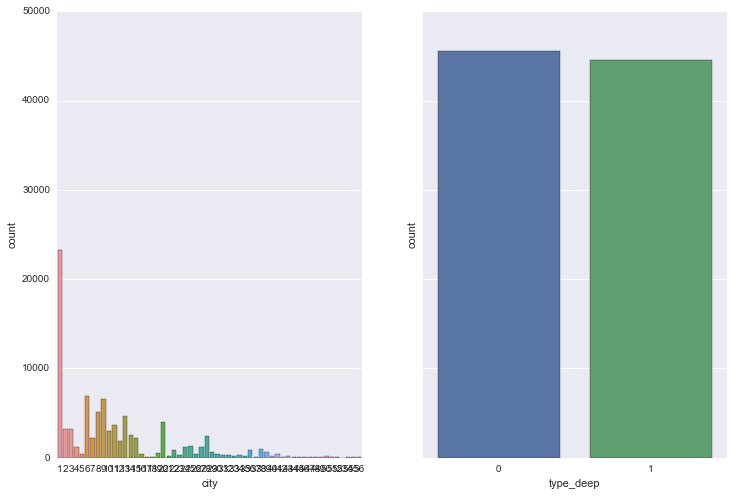

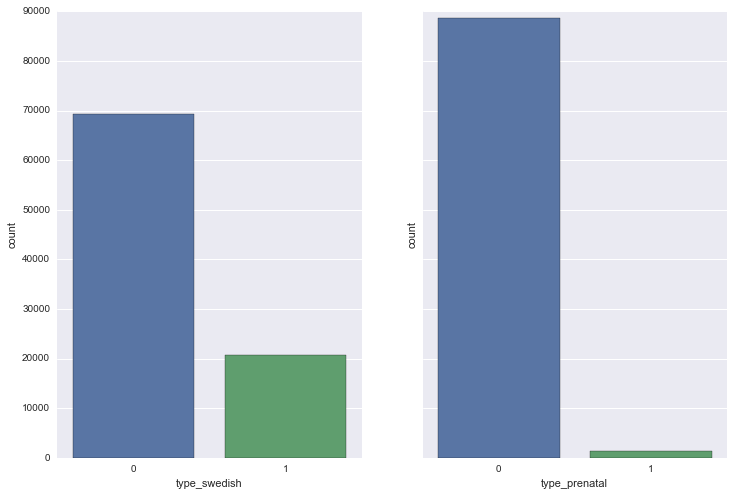

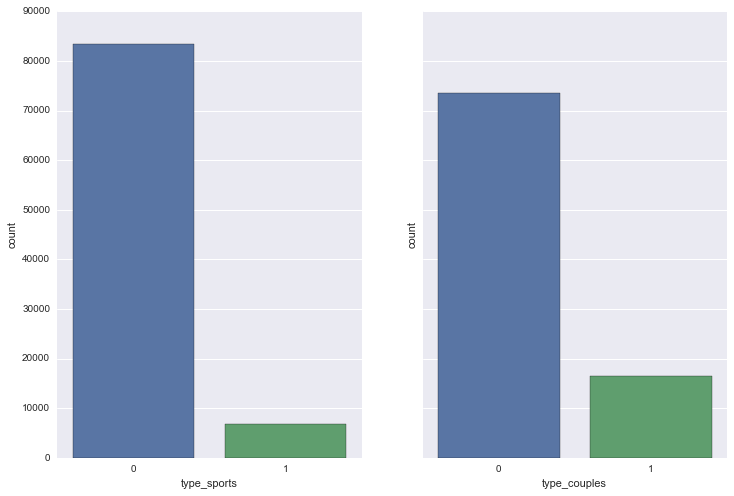

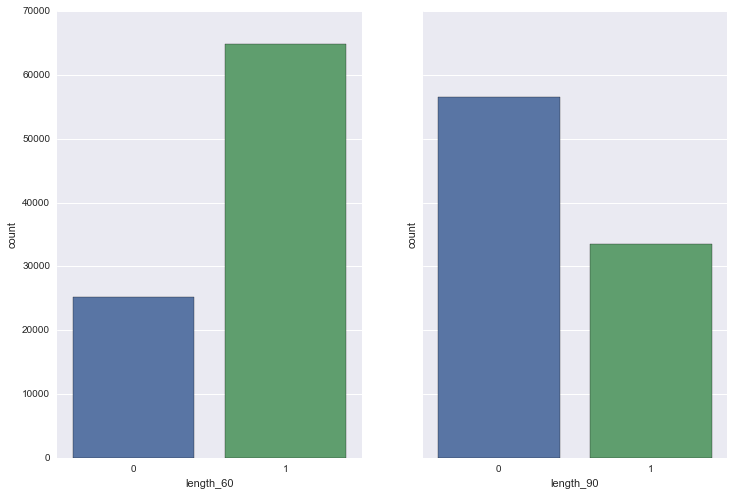

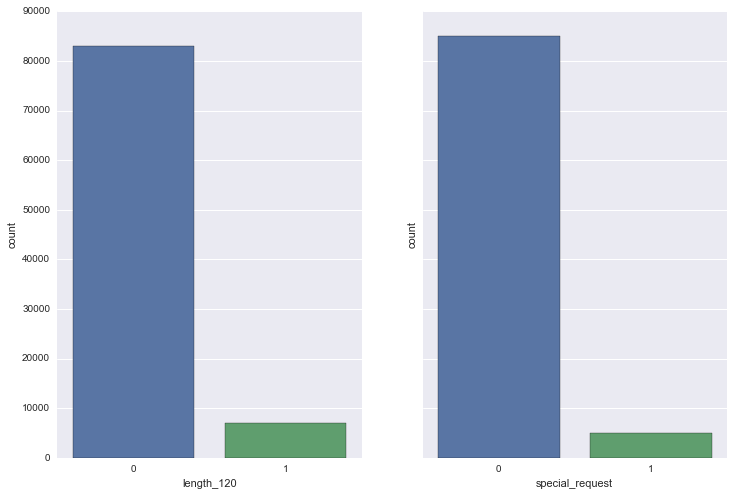

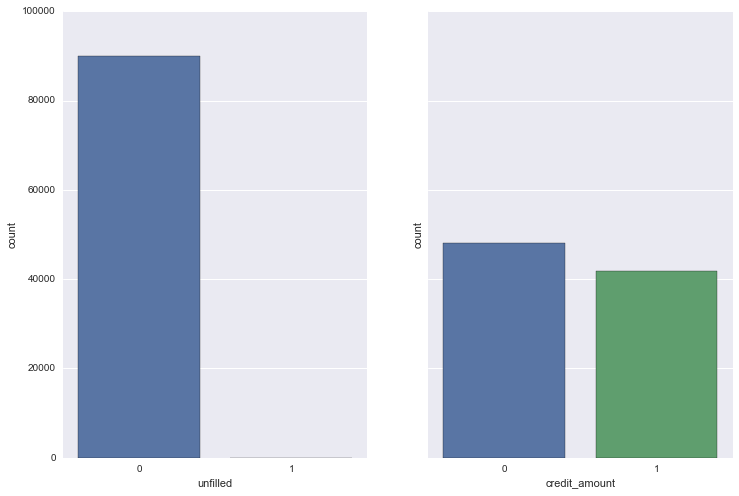

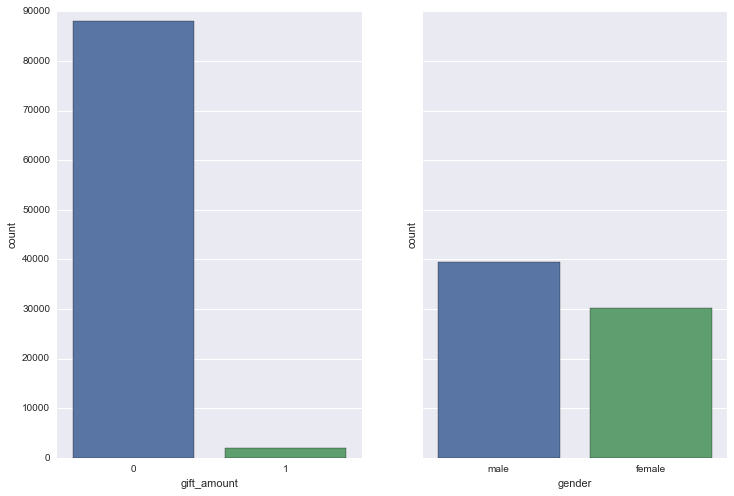

In [15]:
### Let's visulize these categorical variables
### there are 14 variables
length = len(cat_vars) ## length =14

#Plot count plot for all attributes in a 29x4 grid
n_cols = 2
n_rows = 7
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cat_vars[i*n_cols+j], data=data, ax=ax[j])

# Visualize the Client Ranking

In [16]:
### visualize the target variable y
data.client_ranking.value_counts(dropna=False)

C      71752
B      13308
A       3379
AA      1529
AAA      113
Name: client_ranking, dtype: int64

In [17]:
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1) ## set styles for plotting

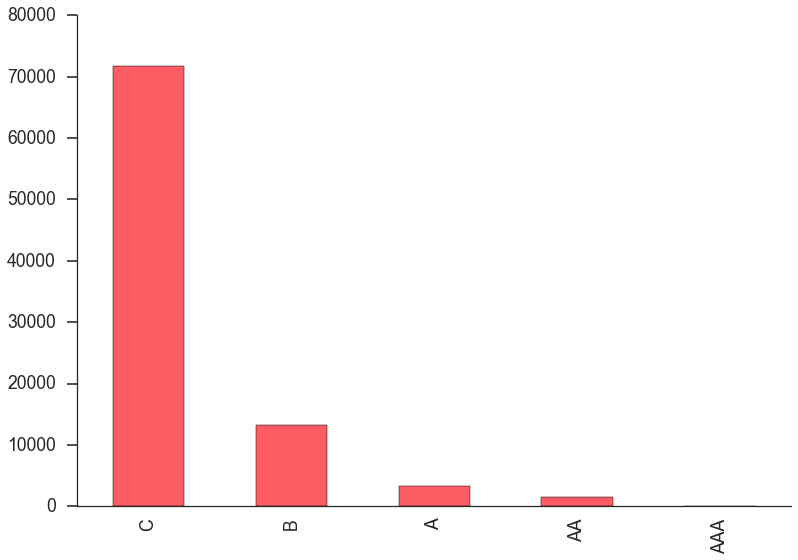

In [18]:
data.client_ranking.value_counts(dropna=False).plot(kind="bar",color="#FD5C64")
sns.despine()

We can see that most of customers belong to rank C, with only a few of them belonging to high rank (A, AA and AAA).

# Use Regular Expression To Retrieve Date (year, month, day) Information

Then we can use regular expression to retrieve the specific date (year, month, day) information.

In [19]:
##### use regular expression to extract year month and day
def search_date(x): # x is a string
    if type(x) != str:
        return x
    else:
        a = re.search('(\d+)\/(\d+)\/(\d+)',x)
        m = int(a.group(1)) # month
        d = int(a.group(2)) # day
        y = int('20' + a.group(3)) # year 
        return datetime.datetime(y,m,d)

In [20]:
data['booking_time_1_date'] = data['booking_time_1'].apply(search_date)
data['booking_time_2_date'] = data['booking_time_2'].apply(search_date)
data['booking_time_3_date'] = data['booking_time_3'].apply(search_date)
data['appt_time_1_date'] = data['appt_time_1'].apply(search_date)
data['appt_time_3_date'] = data['appt_time_3'].apply(search_date)

In [25]:
#### data.appt_time_2 cannot apply search_date method, let's figure out what is wrong
# data['appt_time_2_date'] = data['appt_time_2'].apply(search_date)

Here data.appt_time_2 cannot apply search_date method, let's figure out what is wrong.

In [21]:
### figure out what is wrong with the data
for t in data.appt_time_2.values:
    if type(t)==str and re.search('(\d+)\/(\d+)\/(\d+)',t)==None:
        print t 

0201-06-29 02:07:58


In [28]:
data[data.appt_time_2=="0201-06-29 02:07:58"] # show the specific wrong observation

,city,client_ranking,booking_time_1,booking_time_2,booking_time_3,appt_time_1,appt_time_2,appt_time_3,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender,booking_time_1_date,booking_time_2_date,booking_time_3_date,appt_time_1_date,appt_time_3_date
42454,1,C,4/12/16 22:42,6/27/16 22:45,9/10/16 18:34,4/15/16 19:15,0201-06-29 02:07:58,9/10/16 20:45,0,0,0,0,1,1,1,1,0,0,0,0,female,2016-04-12,2016-06-27,2016-09-10,2016-04-15,2016-09-10


Based on the above data, we can see that there is a typo in appt_time_2, and appt_time_2 should be at the date of 6/29/16, where year 16 match the year in the booking_time_2.

Here we just set arbitray hour, minute and second because they will not be used for further modelling.

In [22]:
# Based on the data, we can see that there is a typo, and appt_time_2 should be at 6/29/16, and we just set arbitray hour,minute, second because they
## will not be used for further modelling
data.appt_time_2.replace("0201-06-29 02:07:58","6/29/16 22:45",inplace=True)

In [23]:
## then we apply search_date method
data['appt_time_2_date'] = data['appt_time_2'].apply(search_date)

In [24]:
data.head() # check the dataset

,city,client_ranking,booking_time_1,booking_time_2,booking_time_3,appt_time_1,appt_time_2,appt_time_3,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender,booking_time_1_date,booking_time_2_date,booking_time_3_date,appt_time_1_date,appt_time_3_date,appt_time_2_date
0,1,AAA,8/30/13 13:04,9/24/13 14:07,9/24/13 14:07,8/30/13 14:30,9/24/13 15:45,9/27/13 19:00,1,1,0,1,0,1,1,0,0,0,0,0,male,2013-08-30,2013-09-24,2013-09-24,2013-08-30,2013-09-27,2013-09-24
1,1,C,10/30/14 4:48,NaN,NaN,10/30/14 19:00,NaN,NaN,1,0,0,0,0,1,0,0,0,0,1,0,female,2014-10-30,NaT,NaT,2014-10-30,NaT,NaT
2,1,C,8/22/13 12:36,11/8/14 18:58,8/2/15 21:39,8/22/13 20:30,11/8/14 20:30,8/2/15 23:15,1,1,0,0,1,1,0,0,0,0,1,0,male,2013-08-22,2014-11-08,2015-08-02,2013-08-22,2015-08-02,2014-11-08
3,1,C,9/20/13 11:04,NaN,NaN,9/20/13 16:00,NaN,NaN,0,1,0,0,0,1,0,0,0,0,1,0,male,2013-09-20,NaT,NaT,2013-09-20,NaT,NaT
4,1,C,1/10/16 10:12,4/9/16 17:07,NaN,1/10/16 14:30,4/9/16 18:15,NaN,0,1,0,0,0,1,0,0,0,0,1,0,female,2016-01-10,2016-04-09,NaT,2016-01-10,NaT,2016-04-09


# Visualize the Count of Booking With Booking Date Or Appt Date

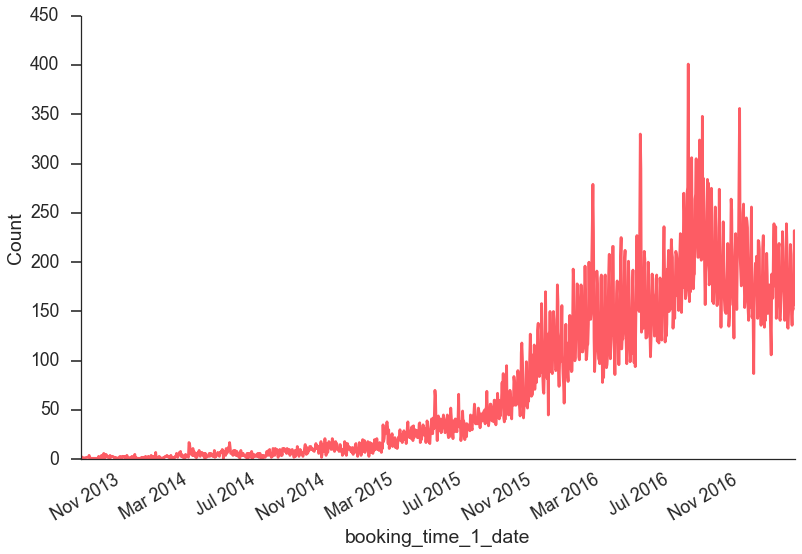

In [25]:
# for booking_time_1_date
data.booking_time_1_date.value_counts().plot(kind="line",color="#FD5C64")
plt.xlabel('booking_time_1_date')
plt.ylabel('Count')
sns.despine()

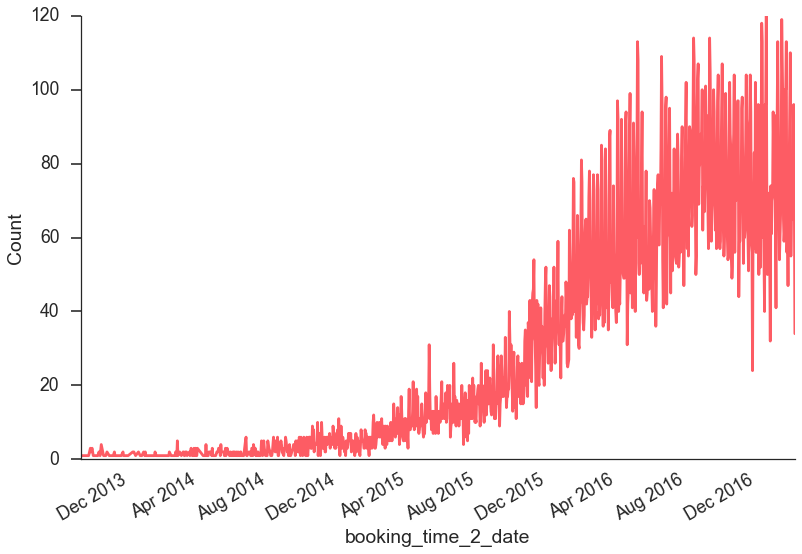

In [26]:
# for booking_time_2_date
data.booking_time_2_date.value_counts().plot(kind="line",color="#FD5C64")
plt.xlabel('booking_time_2_date')
plt.ylabel('Count')  
sns.despine()

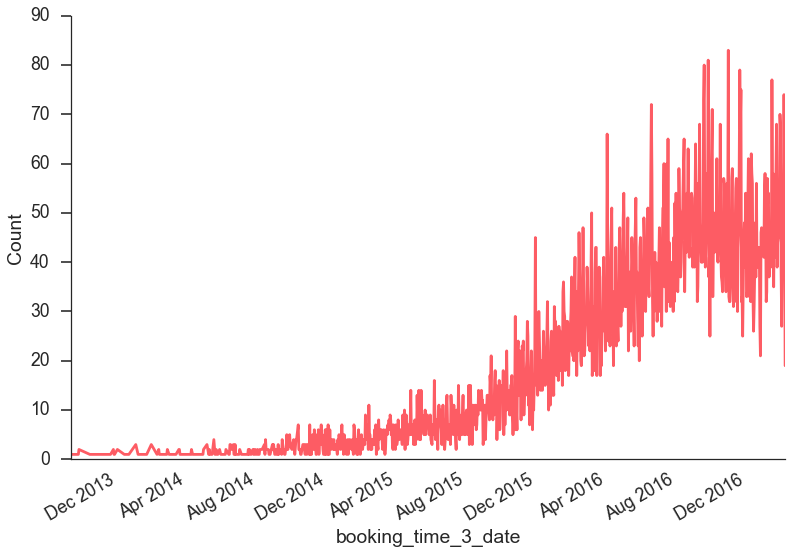

In [27]:
# for booking_time_3_date
data.booking_time_3_date.value_counts().plot(kind="line",color="#FD5C64")
plt.xlabel('booking_time_3_date')
plt.ylabel('Count')  
sns.despine()

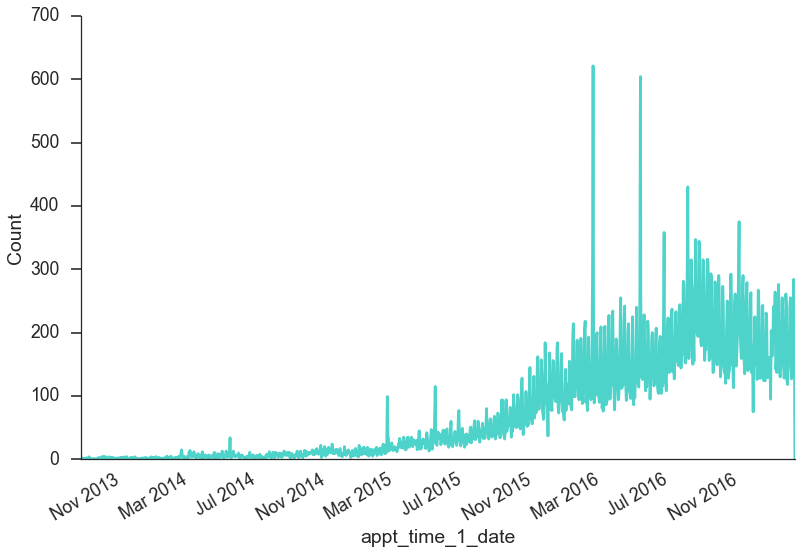

In [28]:
# for appt_time_1_date
data.appt_time_1_date.value_counts().plot(kind="line",color="#4DD3C9")
plt.xlabel('appt_time_1_date')
plt.ylabel('Count')  
sns.despine()

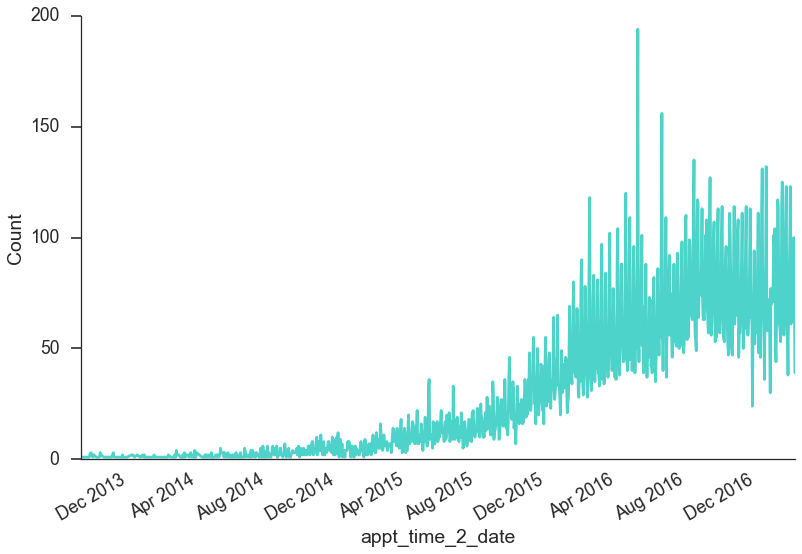

In [29]:
# for appt_time_2_date
data.appt_time_2_date.value_counts().plot(kind="line",color="#4DD3C9")
plt.xlabel('appt_time_2_date')
plt.ylabel('Count')  
sns.despine()

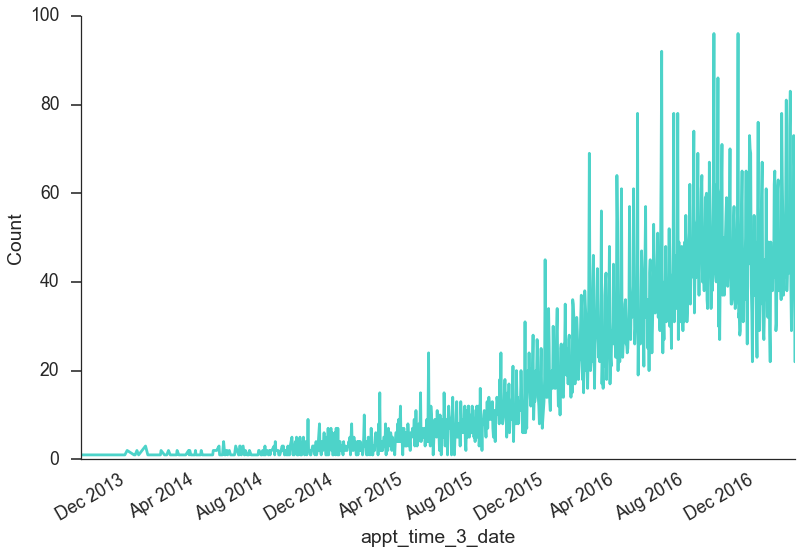

In [30]:
# for appt_time_3_date
data.appt_time_3_date.value_counts().plot(kind="line",color="#4DD3C9")
plt.xlabel('appt_time_3_date')
plt.ylabel('Count')  
sns.despine()

From the above 6 plots, we can see that the booking amount and the appt amount all follow the similar pattern, and they grow significantly from 2013 to now.

# Check Missing Value Proportions

In [31]:
## check missing values
data_nan = (data.isnull().sum() / data.shape[0]) * 100

In [32]:
data_nan[data_nan>0] ## missing data exists in time and gender, largely in booking time 2 and 3, appt time 2 and 3, gender

booking_time_1          0.008881
booking_time_2         62.406057
booking_time_3         78.024223
appt_time_1             0.008881
appt_time_2            62.406057
appt_time_3            78.024223
gender                 22.644065
booking_time_1_date     0.008881
booking_time_2_date    62.406057
booking_time_3_date    78.024223
appt_time_1_date        0.008881
appt_time_3_date       78.024223
appt_time_2_date       62.406057
dtype: float64

Missing data exists in time variables and gender( largely in booking_time_2 and 3, appt_time_2 and 3, gender).

# Visualize the Relationship Between Gender and Client Ranking

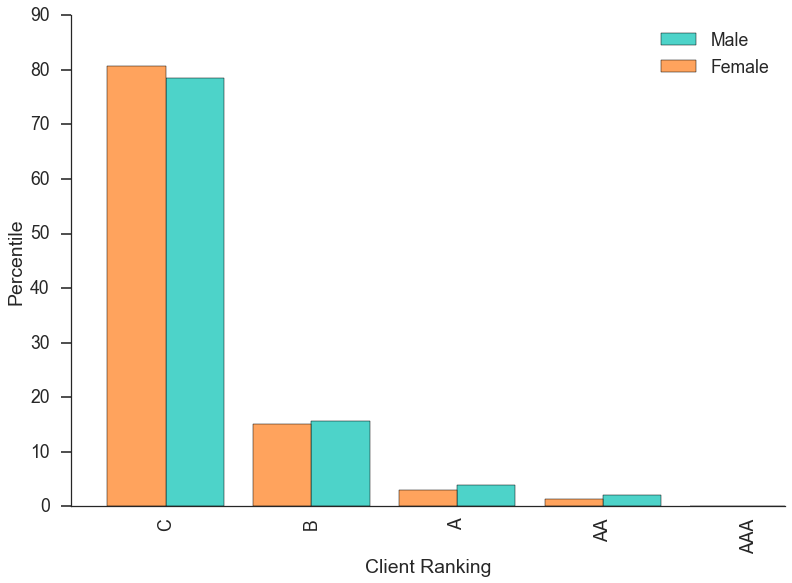

In [33]:
## visualize the relationship between gender and client ranking
male = sum(data.gender=="male")
female = sum(data.gender=="female")
male_ranking = data.loc[data.gender=='male','client_ranking'].value_counts()/male * 100
female_ranking = data.loc[data.gender=="female",'client_ranking'].value_counts()/female * 100

width = 0.4

male_ranking.plot(kind="bar", width=width, color="#4DD3C9", position=0, label='Male')
female_ranking.plot(kind="bar",width=width,color="#FFA35D", position=1, label='Female')
plt.legend()
plt.xlabel('Client Ranking')
plt.ylabel('Percentile')

sns.despine()

We can see there seems to be more males than females that have ranking greater than or equal to A. But we also notice ignoring missing values, we have about 40,000 males and 30,000 females in this dataset. So it is not surprise to observe such pattern. 

We also use pivot table to show the relationship between gender and client ranking.

In [34]:
## pivot table
pd.pivot_table(data,values='type_deep', index='gender',columns='client_ranking',aggfunc='count')

# we can see there are more males who have higher ranking of A, AA and AAA

client_ranking,A,AA,AAA,B,C
gender,,,,,
female,898,388,13,4519,24303
male,1512,805,43,6174,31028


# Visualize the Relationship Between City and Client Ranking

In [35]:
city_ranking = pd.pivot_table(data,values='type_deep',index='city',columns='client_ranking',aggfunc='count', margins=True)

In [36]:
city_ranking['high_ranking_percent'] = (city_ranking.A + city_ranking.AA + city_ranking.AAA)/city_ranking.All
city_ranking['high_ranking_count'] = city_ranking.A + city_ranking.AA + city_ranking.AAA
city_rank_percent = city_ranking.sort_values(by='high_ranking_percent',ascending=False)
city_rank_count = city_ranking.sort_values(by='high_ranking_count',ascending=False)
## high_ranking_percent calculate the percentage of customers that have a ranking at least A in some cities
## high_ranking_count calculate the count of customers that have a ranking at least A in some cities

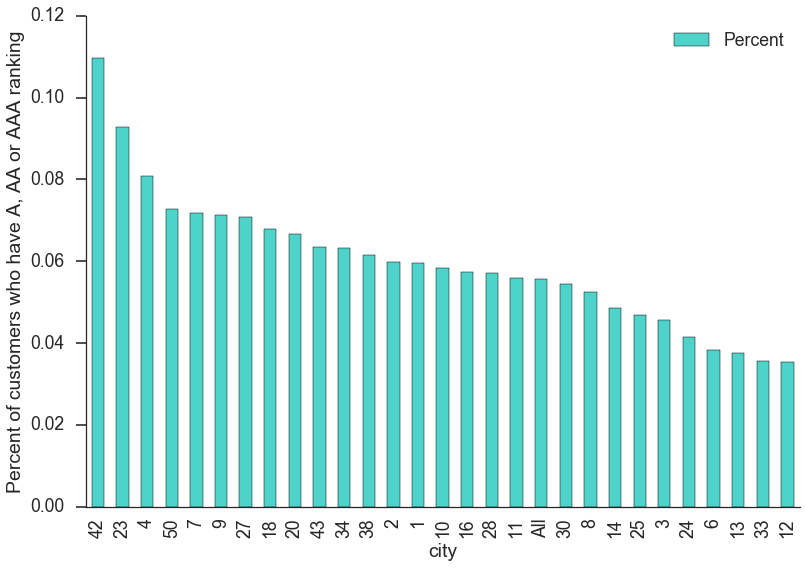

In [38]:
city_rank_percent.high_ranking_percent.dropna().plot(kind='bar',color="#4DD3C9",label='Percent')
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

We can see that in cities 42, 23, 4 ,50 etc, we have the highest percentage of customers that have high ranking.

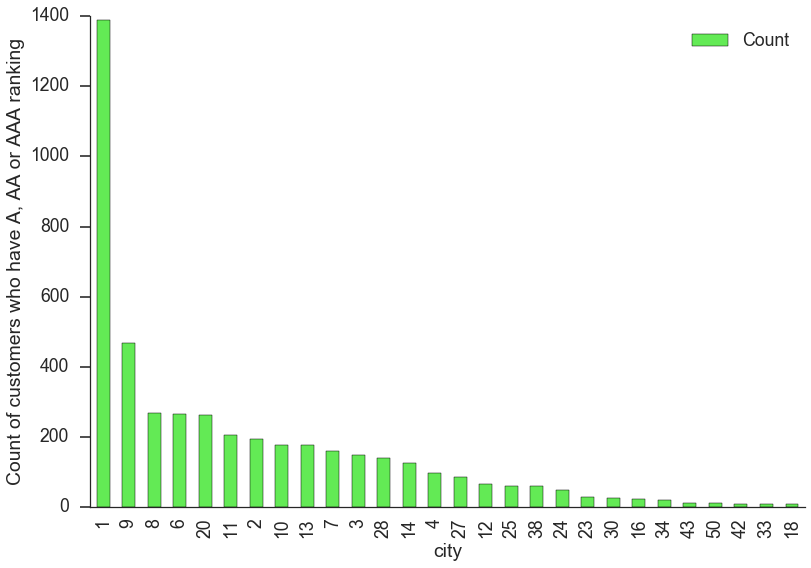

In [39]:
city_rank_count.drop('All').high_ranking_count.dropna().plot(kind='bar',color="#63EA55",label='Count')
plt.legend()
plt.ylabel('Count of customers who have A, AA or AAA ranking')
sns.despine()

We can see that in cities 1, 9, 8,6 etc, we have the highest number of customers that have high ranking.

# Visualize the Relationship Between Other Binary Vars and Client Ranking

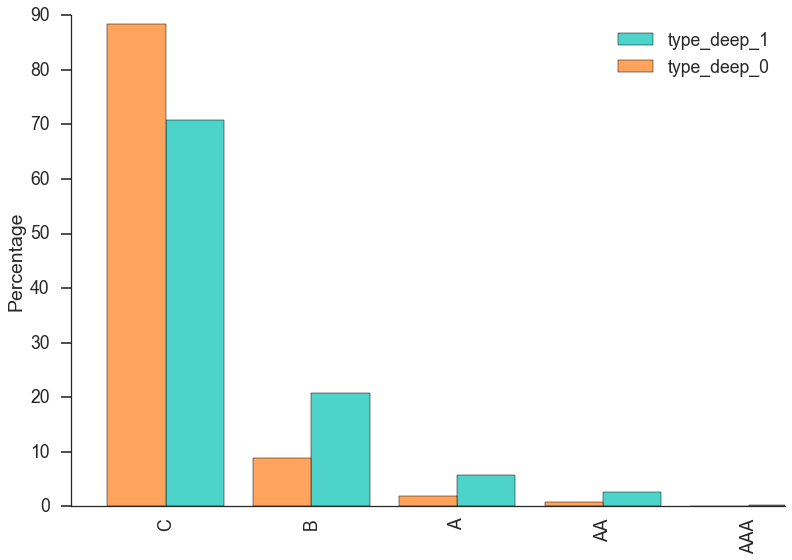

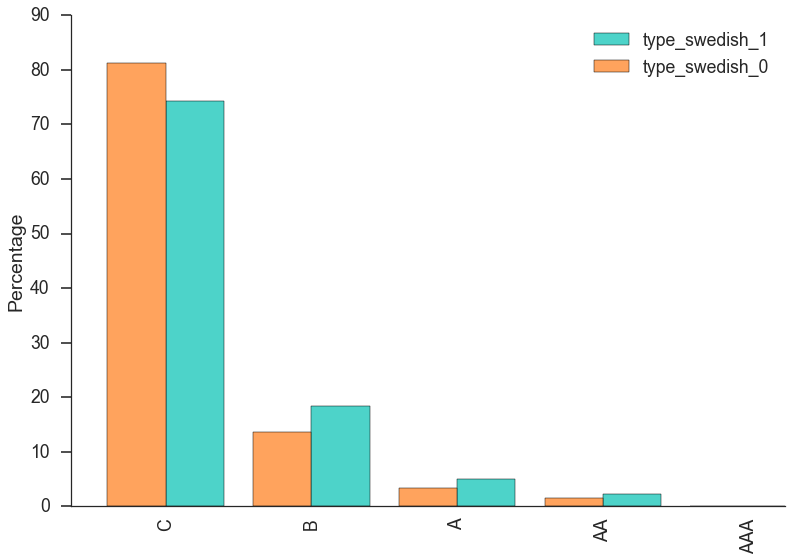

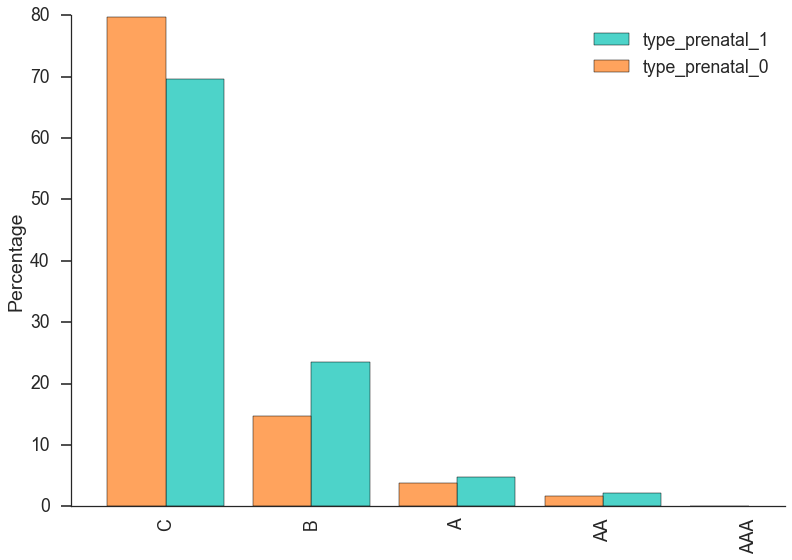

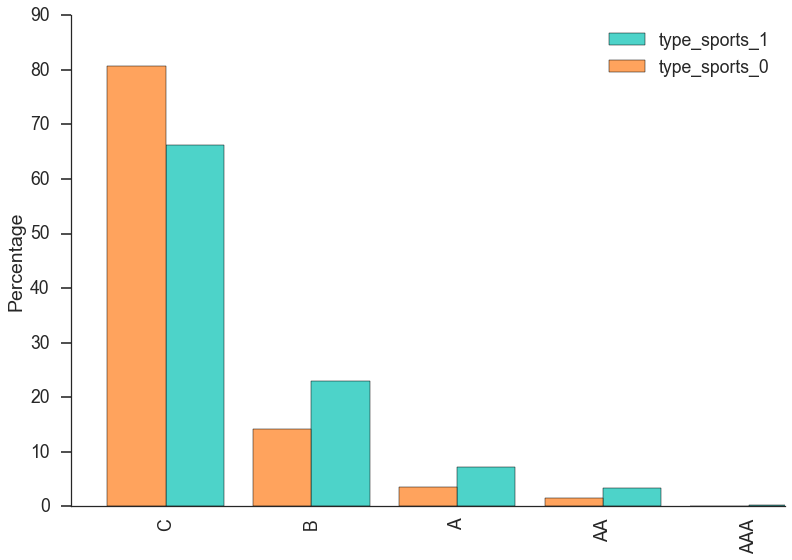

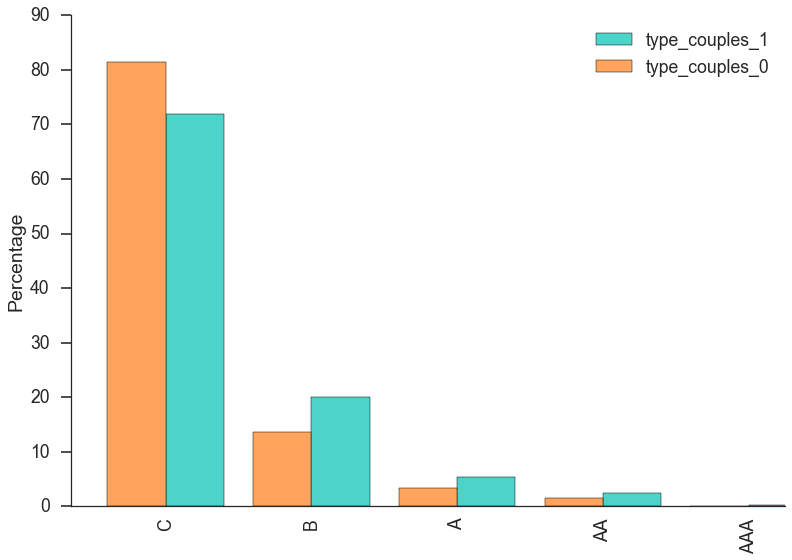

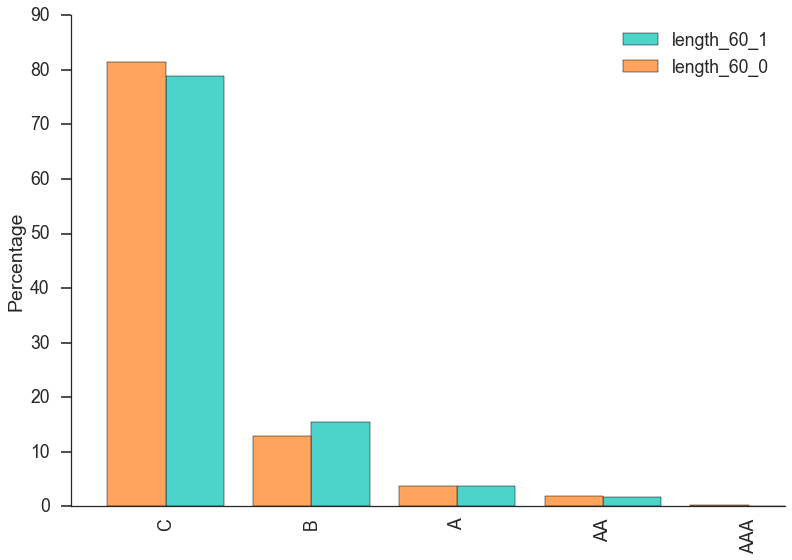

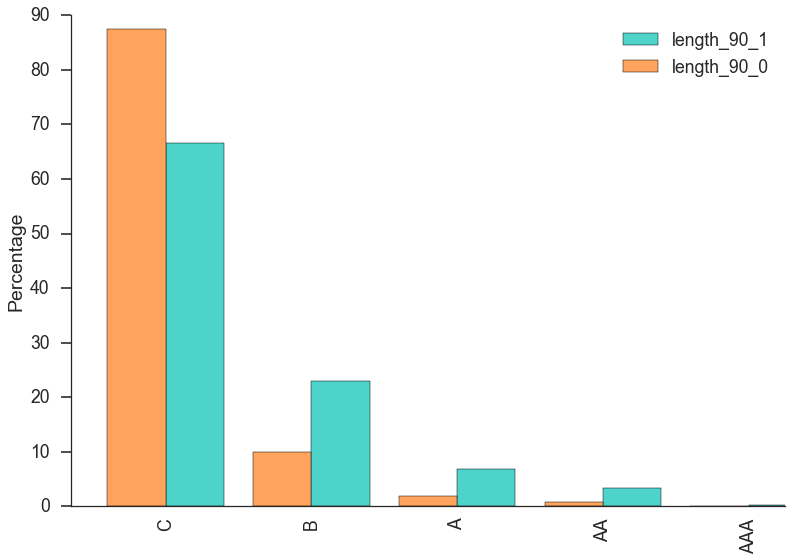

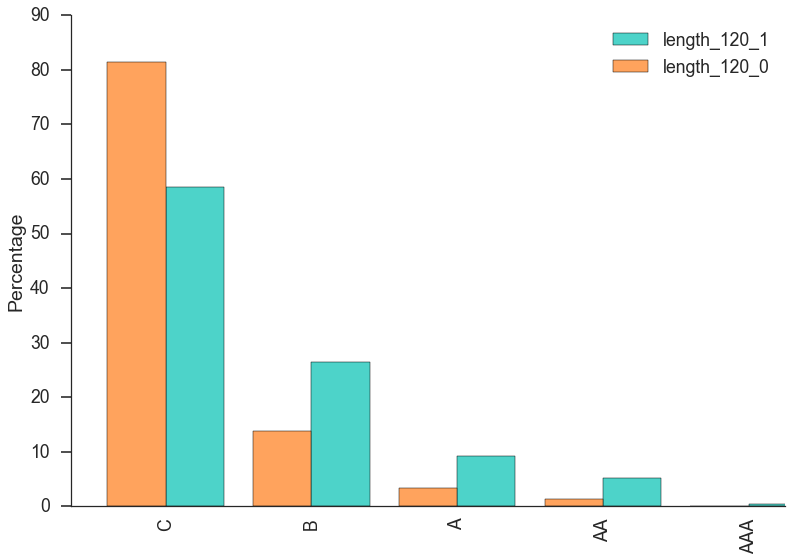

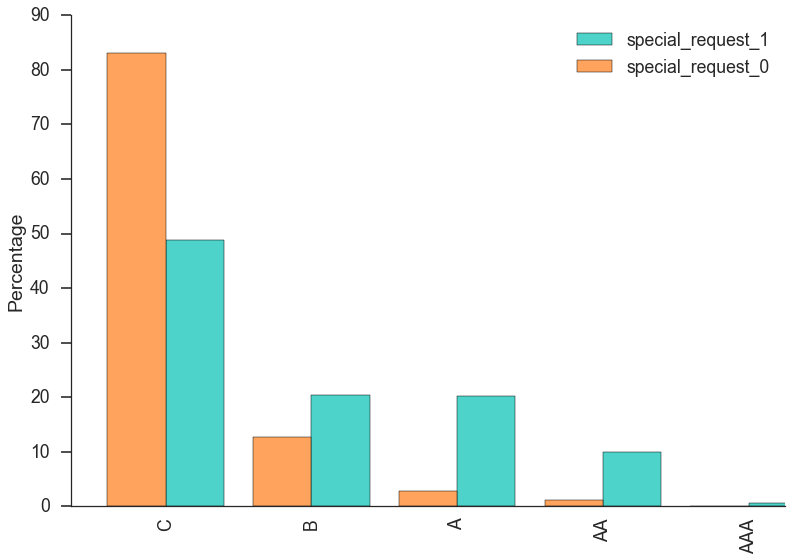

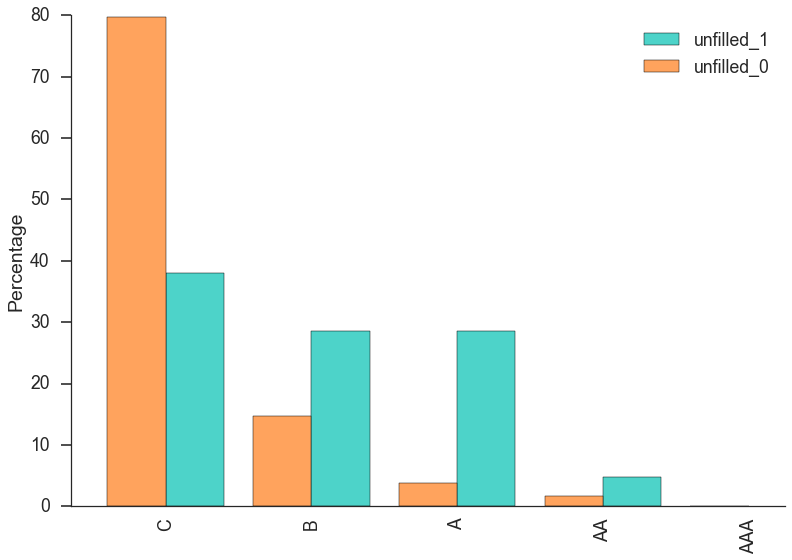

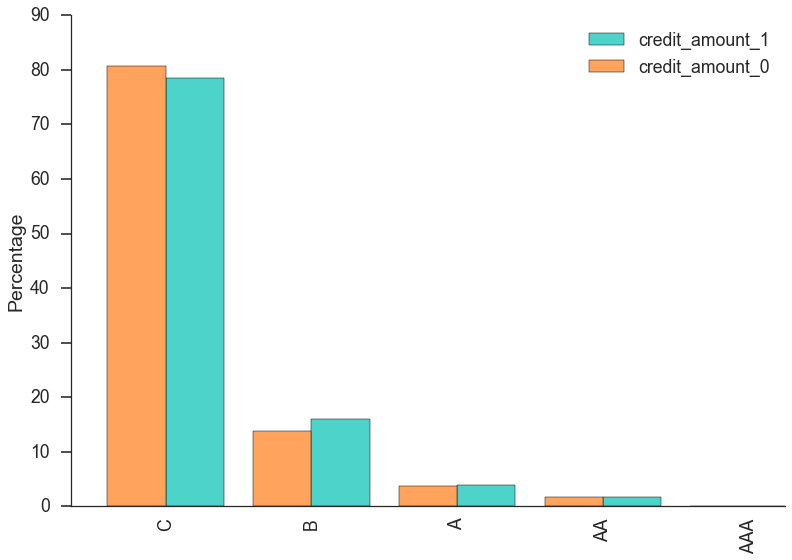

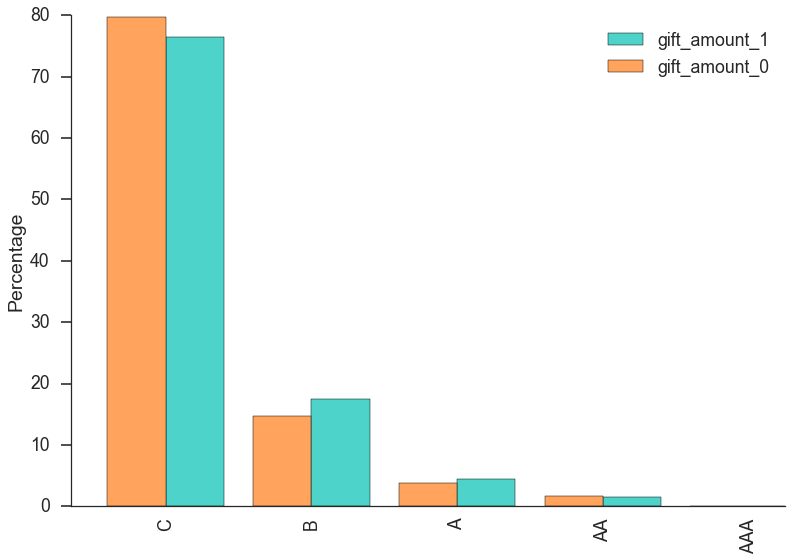

In [40]:
# do the similar thing for all binary variables
binary_list = ['type_deep','type_swedish', 'type_prenatal', 'type_sports',
       'type_couples', 'length_60', 'length_90', 'length_120',
       'special_request', 'unfilled', 'credit_amount', 'gift_amount']

for var in binary_list:
    active = sum(data[var]==1)
    no_active = sum(data[var]==0)
    ac = data.loc[data[var]==1,'client_ranking'].value_counts()/active * 100
    nac = data.loc[data[var]==0,'client_ranking'].value_counts()/no_active * 100
    
    plt.figure()
    ac.plot(kind="bar",width=0.4,position=0,label=var + "_1",color="#4DD3C9")
    nac.plot(kind="bar",width=0.4,position=1,label=var + "_0",color="#FFA35D")
    plt.legend()
    plt.ylabel("Percentage")
    sns.despine()

From the above plots, we can see in most cases that the active situation 1 tends to have more customers with high ranking. This makes sense because the more 1's, the more likely the customer order more massages and has more interaction within our system.

# Calculate the Count of booking Massage Type for Each Customer

In [41]:
#### calculate the total number of booking for each customer

data['booking_count'] = pd.Series(3 - data[['booking_time_1','booking_time_2','booking_time_3']].isnull().sum(axis=1))
#data['appt_count'] = pd.Series(3 - data[['appt_time_1','appt_time_2','appt_time_3']].isnull().sum(axis=1))
#data[data.booking_count != data.appt_count]


I also calculate the appt_count at the beginning, but it turns out it is exactly the same as booking_count, so I deleted and didn't run the code in this notebook.

Further create a pivot table for booking_count and client_ranking.

In [42]:
## pivot table for booking_count and client_ranking
book_count_rank = pd.pivot_table(data,values='type_deep', index='booking_count',columns='client_ranking',aggfunc='count',margins=True)
book_count_rank
#### only when booking_count = 3, we have A, AA and AAA class

client_ranking,A,AA,AAA,B,C,All
booking_count,,,,,,
0,NaN,NaN,NaN,NaN,3.0,3.0
1,NaN,NaN,NaN,NaN,56208.0,56208.0
2,NaN,NaN,NaN,4794.0,9290.0,14084.0
3,3379.0,1529.0,113.0,8514.0,6251.0,19786.0
All,3379.0,1529.0,113.0,13308.0,71752.0,90081.0


We can clearly see that only if the customers have truly booking 3 times could he or she get high ranking greater than or equal to A.

# Missing Data Replacement and  Feature Engineering for Date Variables

Missing data handling in gender variable by replacing missing values as -1 (a new category).

In [43]:
#### missing data handling
data.gender.replace(np.nan,-1,inplace=True)  # replace missing values in gender as -1(a new category)

Do feature engineering for the time part.

In [44]:
### do feature engineering for the time part
### extract the year, month, day information from booking_1,_2,_3 and appt_1,_2,_3
data['booking_1_year'] = data.booking_time_1_date.apply(lambda x: x.year)
data['booking_1_month'] = data.booking_time_1_date.apply(lambda x: x.month)
data['booking_1_day'] = data.booking_time_1_date.apply(lambda x: x.day)

In [45]:
data['booking_2_year'] = data.booking_time_2_date.apply(lambda x: x.year)
data['booking_2_month'] = data.booking_time_2_date.apply(lambda x: x.month)
data['booking_2_day'] = data.booking_time_2_date.apply(lambda x: x.day)

In [46]:
data['booking_3_year'] = data.booking_time_3_date.apply(lambda x: x.year)
data['booking_3_month'] = data.booking_time_3_date.apply(lambda x: x.month)
data['booking_3_day'] = data.booking_time_3_date.apply(lambda x: x.day)

In [47]:
data['appt_1_year'] = data.appt_time_1_date.apply(lambda x: x.year)
data['appt_1_month'] = data.appt_time_1_date.apply(lambda x: x.month)
data['appt_1_day'] = data.appt_time_1_date.apply(lambda x: x.day)

In [48]:
data['appt_2_year'] = data.appt_time_2_date.apply(lambda x: x.year)
data['appt_2_month'] = data.appt_time_2_date.apply(lambda x: x.month)
data['appt_2_day'] = data.appt_time_2_date.apply(lambda x: x.day)

In [49]:
data['appt_3_year'] = data.appt_time_3_date.apply(lambda x: x.year)
data['appt_3_month'] = data.appt_time_3_date.apply(lambda x: x.month)
data['appt_3_day'] = data.appt_time_3_date.apply(lambda x: x.day)

For 5 different type of massage, create a new variable booking_amt to represent how many of them have been selected in the first three times.

In [50]:
data['booking_amt'] = data.type_deep + data.type_swedish + data.type_prenatal + data.type_sports + data.type_couples
## for 5 different type of massage, how many of them have been selected in the first three times

In [51]:
sum(data['booking_amt'] == data['booking_count']) # there is difference between booking_amt and booking_count, 47946 < 90081

47946

There is difference between booking_amt and booking_count, as 47946 < 90081.

For 3 different length of massage, create a new variable length_variaty to represent how many of them have been selected in the first three times.

In [52]:
data['length_variaty'] = data.length_60 + data.length_90 + data.length_120 # how many of the 3 length that the customer have taken during the 3first 3 massages

Create a new variable called days_diff_12 to show the difference of days between the first and the second booking.
Also, the variable days_diff_23 can be used to show the difference of days between the second and the third booking.

In [53]:
##### the time difference between the first and the second booking
##### the time difference between the second and the third booking
data['days_diff_12'] = data.booking_time_2_date-data.booking_time_1_date
data['days_diff_23'] = data.booking_time_3_date-data.booking_time_2_date

# Visualize the Relationship Between Booking_amt and Client Ranking

In [54]:
##### The following code will visualize the clinet_ranking with 
##### 1. booking_amt  2. length_variaty 3.days_diff_12 4.days_diff_23
book_amt_ranking = pd.pivot_table(data,values='type_deep',index='booking_amt',columns='client_ranking',aggfunc='count',margins=True)
book_amt_ranking

client_ranking,A,AA,AAA,B,C,All
booking_amt,,,,,,
0,255.0,107.0,12.0,1420.0,14637.0,16431.0
1,1560.0,695.0,50.0,6450.0,50653.0,59408.0
2,1273.0,585.0,48.0,4567.0,5840.0,12313.0
3,277.0,140.0,3.0,829.0,601.0,1850.0
4,14.0,2.0,NaN,42.0,21.0,79.0
All,3379.0,1529.0,113.0,13308.0,71752.0,90081.0


In [55]:
book_amt_ranking.replace(np.nan,0,inplace=True) # replace NaN will 0
book_amt_ranking['high_ranking_percent'] = (book_amt_ranking.A + book_amt_ranking.AA + book_amt_ranking.AAA)/book_amt_ranking.All
book_amt_ranking['high_ranking_count'] = book_amt_ranking.A + book_amt_ranking.AA + book_amt_ranking.AAA

In [56]:
book_amt_ranking

client_ranking,A,AA,AAA,B,C,All,high_ranking_percent,high_ranking_count
booking_amt,,,,,,,,
0,255.0,107.0,12.0,1420.0,14637.0,16431.0,0.022762,374.0
1,1560.0,695.0,50.0,6450.0,50653.0,59408.0,0.038799,2305.0
2,1273.0,585.0,48.0,4567.0,5840.0,12313.0,0.154796,1906.0
3,277.0,140.0,3.0,829.0,601.0,1850.0,0.227027,420.0
4,14.0,2.0,0.0,42.0,21.0,79.0,0.202532,16.0
All,3379.0,1529.0,113.0,13308.0,71752.0,90081.0,0.055739,5021.0


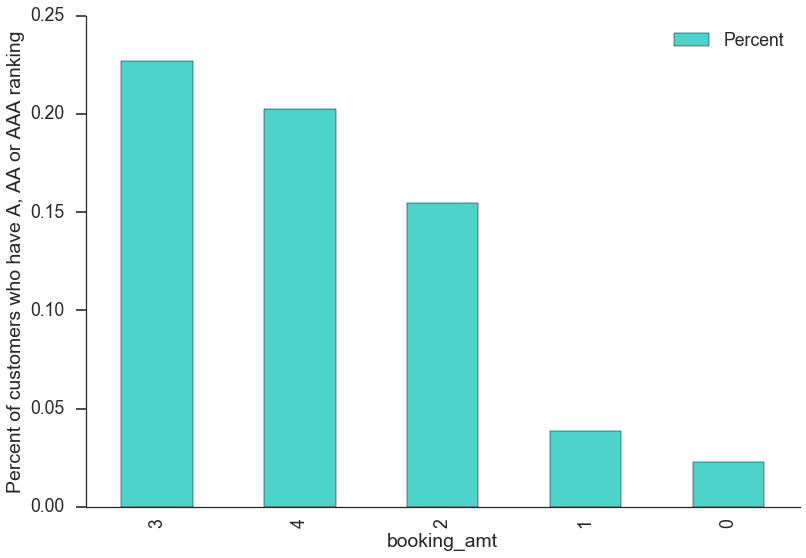

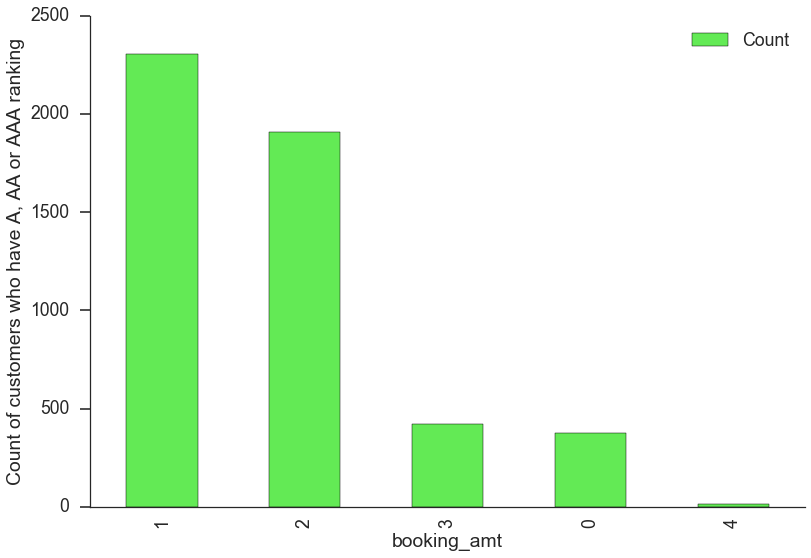

In [59]:
plt.figure()
book_amt_ranking.sort_values(by='high_ranking_percent',ascending=False).high_ranking_percent.drop('All').plot(kind='bar',color="#4DD3C9",label="Percent")
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_amt_ranking.drop('All').sort_values(by='high_ranking_count',ascending=False).high_ranking_count.plot(kind='bar',color="#63EA55",label="Count")
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

From the above plot, we can clearly see that usually the more booking_amt, the higher percentage of customers will have high ranking.

On the other hand, most customers have booking_amt less than 3 so the absolute count of customers having high ranking appears to be high with booking_amt 1 and 2.

# Visualize the Relationship Between Length Variety and Client Ranking

In [60]:
book_lv_ranking = pd.pivot_table(data,values='type_deep',index='length_variaty',columns='client_ranking',aggfunc='count',margins=True)
book_lv_ranking

client_ranking,A,AA,AAA,B,C,All
length_variaty,,,,,,
0,NaN,NaN,NaN,NaN,14.0,14.0
1,1536.0,617.0,51.0,7389.0,66064.0,75657.0
2,1665.0,808.0,51.0,5498.0,5456.0,13478.0
3,178.0,104.0,11.0,421.0,218.0,932.0
All,3379.0,1529.0,113.0,13308.0,71752.0,90081.0


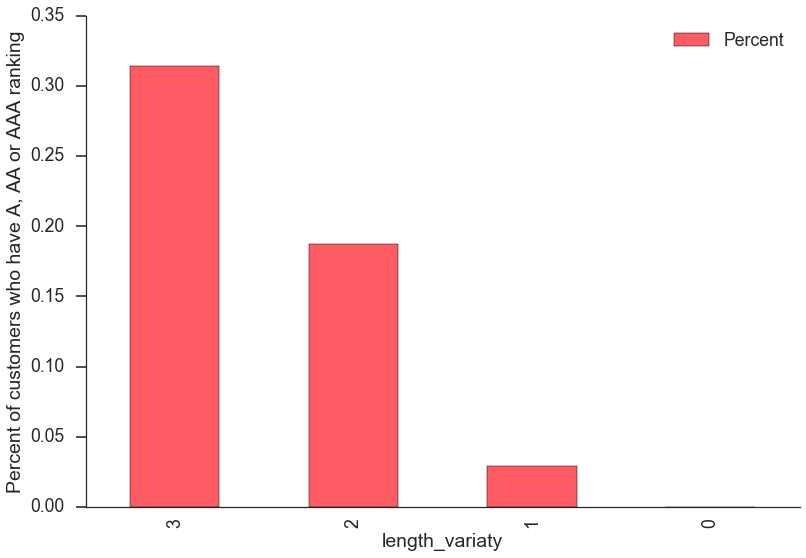

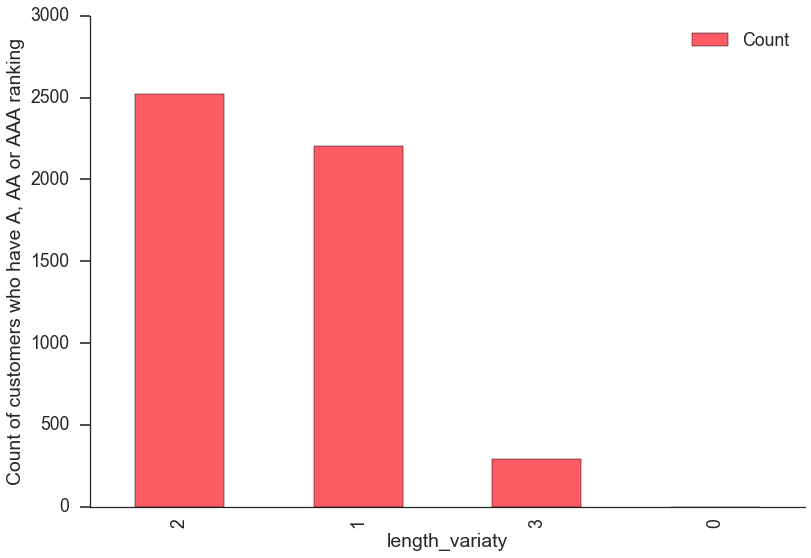

In [61]:
#### visualize length variaty with client ranking
book_lv_ranking.replace(np.nan,0,inplace=True)
book_lv_ranking['high_ranking_percent'] = (book_lv_ranking.A + book_lv_ranking.AA + book_lv_ranking.AAA)/book_lv_ranking.All
book_lv_ranking['high_ranking_count'] = book_lv_ranking.A + book_lv_ranking.AA + book_lv_ranking.AAA

plt.figure()
book_lv_ranking.drop('All').sort_values(by='high_ranking_percent',ascending=False).high_ranking_percent.plot(kind='bar',color="#FD5C64",label='Percent')
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_lv_ranking.drop('All').sort_values(by='high_ranking_count',ascending=False).high_ranking_count.plot(kind='bar',color="#FD5C64",label="Count")
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

From the above plot, we can clearly see that usually the more length variety, the higher percentage of customers will have high ranking.

On the other hand, most customers have length variety less than 3 so the absolute count of customers having high ranking appears to be high with length_variaty 1 and 2.

# Visualize the Relationship Between Days_diff_12 and Client Ranking

In [62]:
#### visualize days_diff_12 with client ranking
book_12_ranking = pd.pivot_table(data,values='type_deep',index='days_diff_12',columns='client_ranking',aggfunc='count',margins=True)

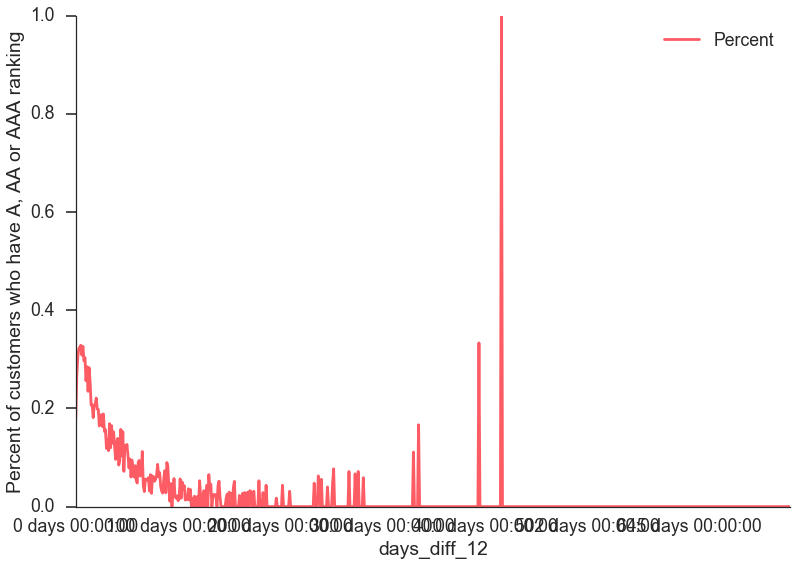

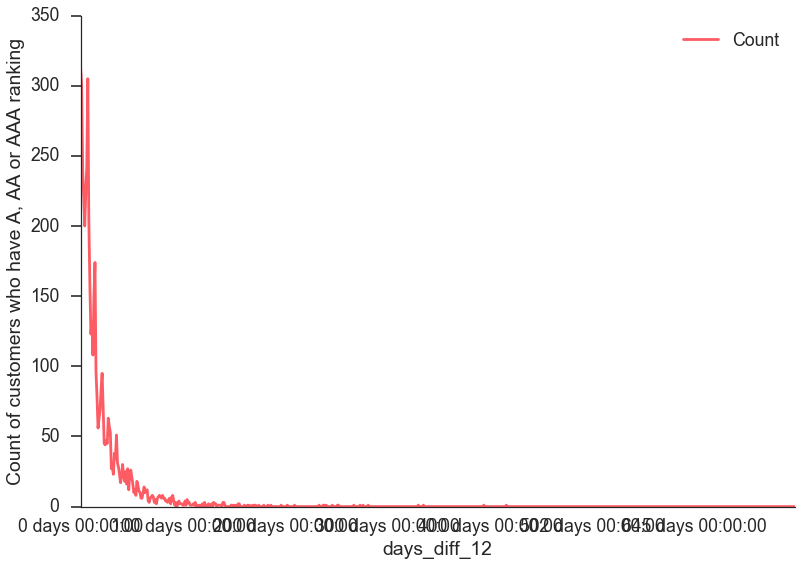

In [63]:
#### visualize length variaty with client ranking
book_12_ranking.replace(np.nan,0,inplace=True)
book_12_ranking['high_ranking_percent'] = (book_12_ranking.A + book_12_ranking.AA + book_12_ranking.AAA)/book_12_ranking.All
book_12_ranking['high_ranking_count'] = book_12_ranking.A + book_12_ranking.AA + book_12_ranking.AAA

plt.figure()
book_12_ranking.drop('All').high_ranking_percent.plot(kind='line',color="#FD5C64",label='Percent')
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_12_ranking.drop('All').high_ranking_count.plot(kind='line',color="#FD5C64",label="Count")
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

From the above plot, we can clearly see that usually the more days difference between booking1 and booking2, the lower percentage of customers will have high ranking (except for some special cases).

On the other hand, most customers have small values of days_diff_12 so the absolute count of customers having high ranking appears to be high with small values of days_diff_12.

# Visualize the Relationship Between Days_diff_23 and Client Ranking

In [64]:
#### visualize days_diff_23 with client ranking
book_23_ranking = pd.pivot_table(data,values='type_deep',index='days_diff_23',columns='client_ranking',aggfunc='count',margins=True)

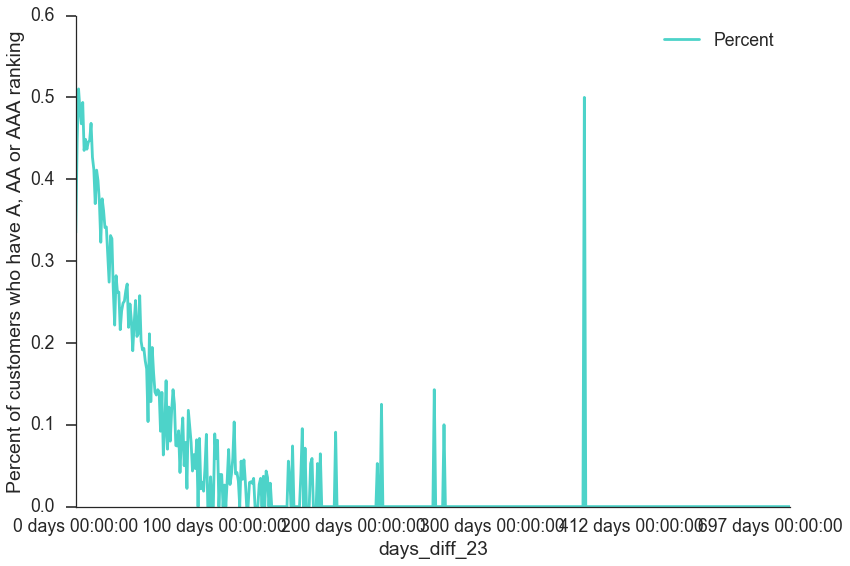

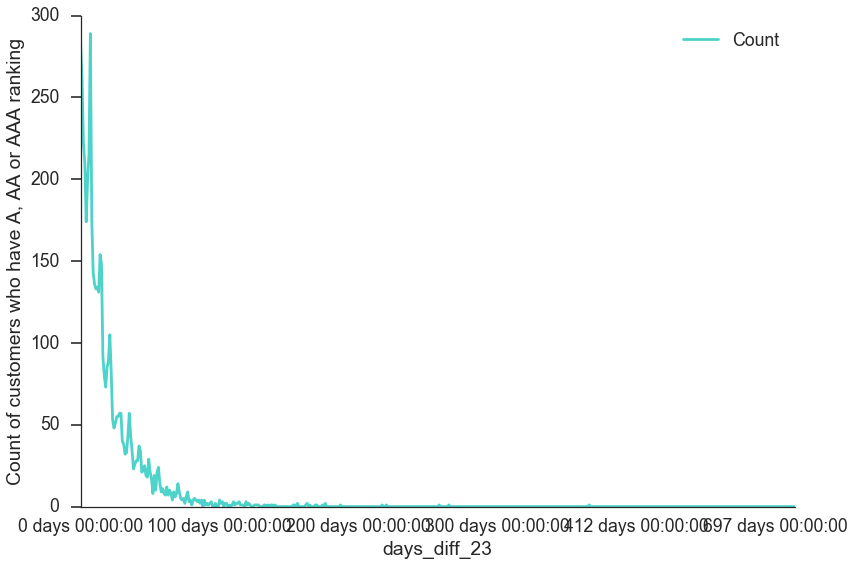

In [65]:
#### visualize length variaty with client ranking
book_23_ranking.replace(np.nan,0,inplace=True)
book_23_ranking['high_ranking_percent'] = (book_23_ranking.A + book_23_ranking.AA + book_23_ranking.AAA)/book_23_ranking.All
book_23_ranking['high_ranking_count'] = book_23_ranking.A + book_23_ranking.AA + book_23_ranking.AAA

plt.figure()
book_23_ranking.drop('All').high_ranking_percent.plot(kind='line',color="#4DD3C9",label='Percent')
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_23_ranking.drop('All').high_ranking_count.plot(kind='line',color="#4DD3C9",label="Count")
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

From the above plot, we can clearly see that usually the more days difference between booking2 and booking3, the lower percentage of customers will have high ranking (except for some special cases).

On the other hand, most customers have small values of days_diff_23 so the absolute count of customers having high ranking appears to be high with small values of days_diff_23.

# Visualize the Relationship Between Year of Booking_1 and Client Ranking

First we create 3 pivot tables to show the relationship of booking_1 year, month and day with client_ranking.

In [66]:
book_year_ranking = pd.pivot_table(data,values='type_deep',index='booking_1_year',columns='client_ranking',aggfunc='count',margins=True)
book_month_ranking = pd.pivot_table(data,values='type_deep',index='booking_1_month',columns='client_ranking',aggfunc='count',margins=True)
book_day_ranking = pd.pivot_table(data,values='type_deep',index='booking_1_day',columns='client_ranking',aggfunc='count',margins=True)

In [67]:
### print the above 3 pivot tables
print book_year_ranking
print '\n'
print book_month_ranking
print '\n'
print book_day_ranking

client_ranking       A      AA    AAA        B        C      All
booking_1_year                                                  
2013.0             6.0     4.0    1.0     18.0    159.0    188.0
2014.0            61.0    35.0    4.0    259.0   2050.0   2409.0
2015.0           489.0   247.0   12.0   2158.0  14913.0  17819.0
2016.0          2638.0  1222.0   83.0  10282.0  49018.0  63243.0
2017.0           185.0    21.0   13.0    590.0   5605.0   6414.0
All             3379.0  1529.0  113.0  13307.0  71745.0  90073.0


client_ranking        A      AA    AAA        B        C      All
booking_1_month                                                  
1.0               305.0    89.0   17.0   1086.0   8621.0  10118.0
2.0               134.0    66.0    1.0    569.0   5061.0   5831.0
3.0               130.0    73.0    2.0    649.0   4193.0   5047.0
4.0               197.0    92.0    2.0    648.0   4348.0   5287.0
5.0               195.0    87.0    4.0    970.0   5310.0   6566.0
6.0             

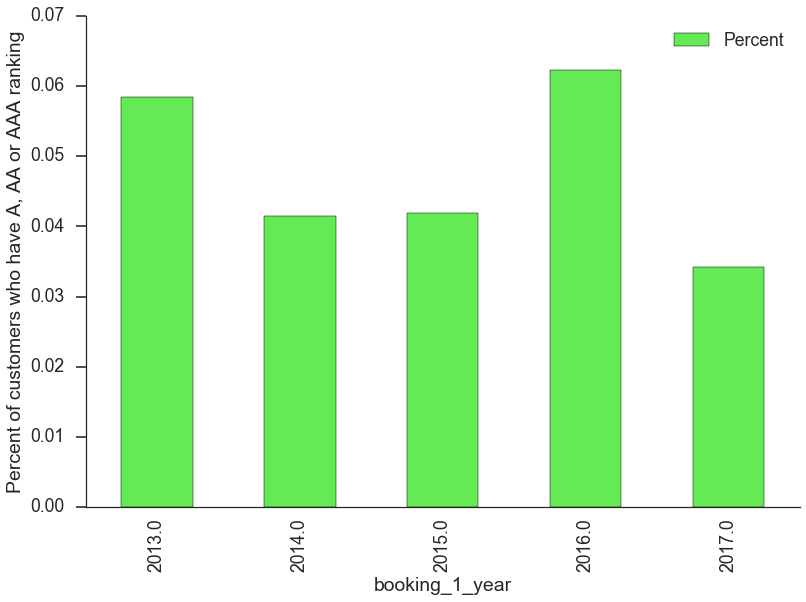

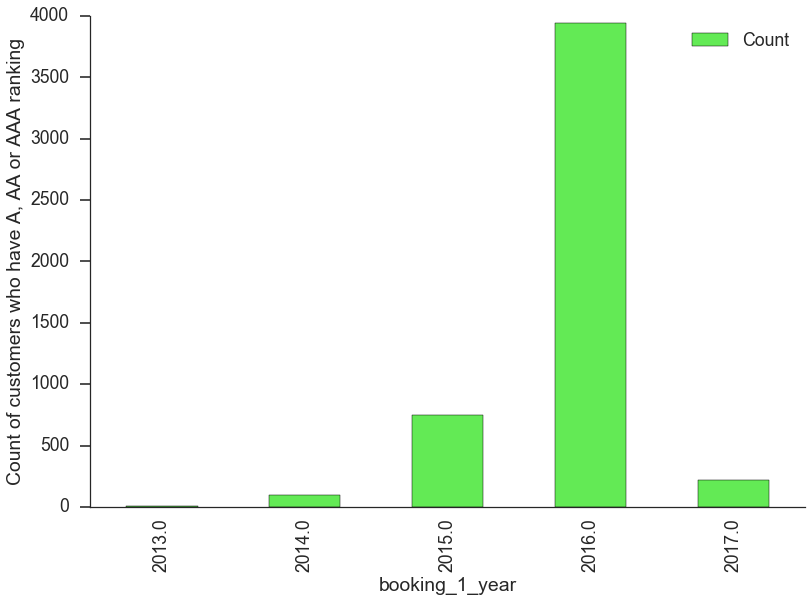

In [68]:
book_year_ranking.replace(np.nan,0,inplace=True)

book_year_ranking['high_ranking_percent'] = (book_year_ranking.A + book_year_ranking.AA + book_year_ranking.AAA)/book_year_ranking.All
book_year_ranking['high_ranking_count'] = book_year_ranking.A + book_year_ranking.AA + book_year_ranking.AAA

plt.figure()
book_year_ranking.drop('All').high_ranking_percent.plot(kind='bar',color="#63EA55",label="Percent")
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_year_ranking.drop('All').high_ranking_count.plot(kind='bar',color="#63EA55",label='Count')
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

From the above plot, higher percentage appears in year 2016, which also holds for the higher count.

I think this is probably because we have most observations in 2016.

# Visualize the Relationship Between Month of Booking_1 and Client Ranking

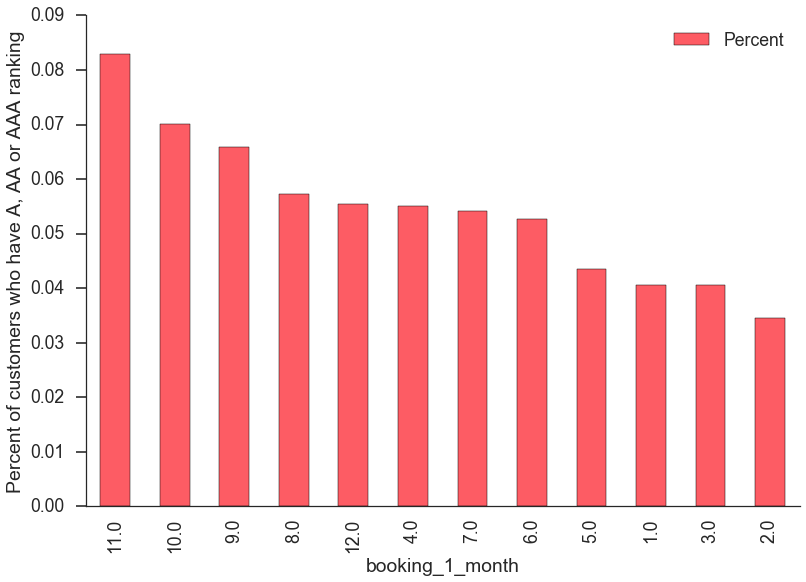

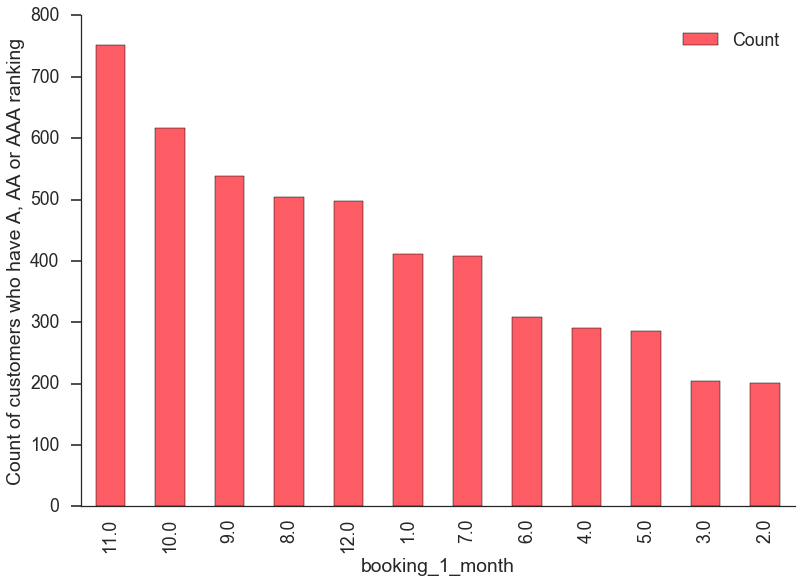

In [69]:
### do the same thing to month
book_month_ranking.replace(np.nan,0,inplace=True)

book_month_ranking['high_ranking_percent'] = (book_month_ranking.A + book_month_ranking.AA + book_month_ranking.AAA)/book_month_ranking.All
book_month_ranking['high_ranking_count'] = book_month_ranking.A + book_month_ranking.AA + book_month_ranking.AAA

plt.figure()
book_month_ranking.drop('All').sort_values(by='high_ranking_percent',ascending=False).high_ranking_percent.plot(kind='bar',color="#FD5C64",label="Percent")
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_month_ranking.drop('All').sort_values(by='high_ranking_count',ascending=False).high_ranking_count.plot(kind='bar',color="#FD5C64",label='Count')
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

From the above plot, we can see that the highest percent and count both appear to be in November, October and September.

This gives us a general idea of the seasons that customers like to order a massage most is Fall.

# Visualize the Relationship Between Days of Booking_1 and Client Ranking

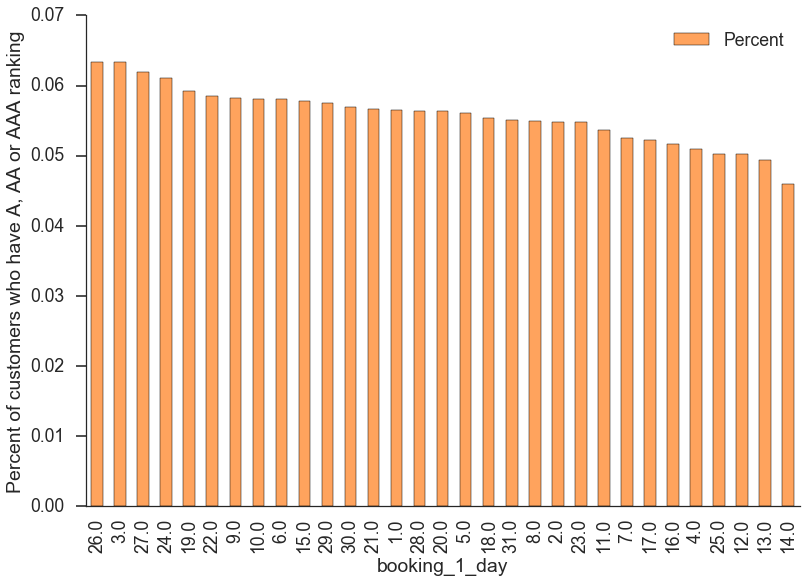

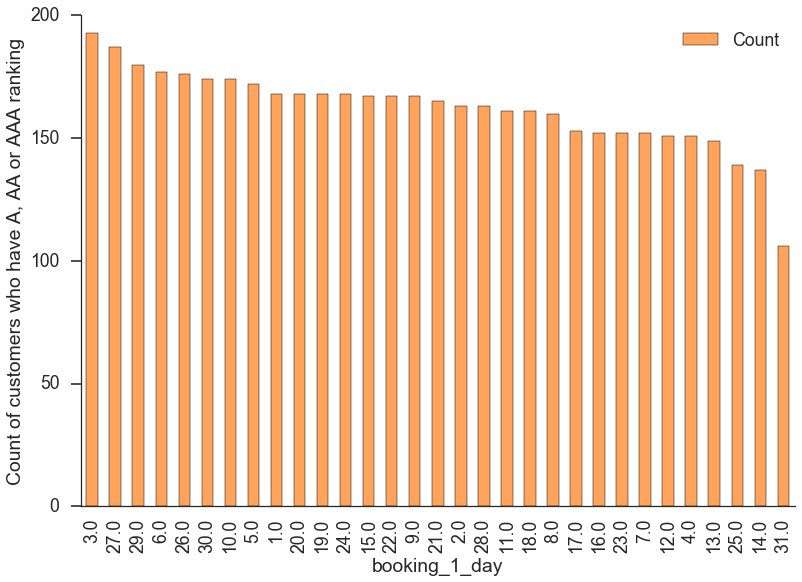

In [70]:
### do the same thing to day
book_day_ranking.replace(np.nan,0,inplace=True)

book_day_ranking['high_ranking_percent'] = (book_day_ranking.A + book_day_ranking.AA + book_day_ranking.AAA)/book_day_ranking.All
book_day_ranking['high_ranking_count'] = book_day_ranking.A + book_day_ranking.AA + book_day_ranking.AAA

plt.figure()
book_day_ranking.drop('All').sort_values(by='high_ranking_percent',ascending=False).high_ranking_percent.plot(kind='bar',color="#FFA35D",label="Percent")
plt.ylabel('Percent of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

plt.figure()
book_day_ranking.drop('All').sort_values(by='high_ranking_count',ascending=False).high_ranking_count.plot(kind='bar',color="#FFA35D",label='Count')
plt.ylabel('Count of customers who have A, AA or AAA ranking')
plt.legend()
sns.despine()

No specific patterns can be found based on days.

# Create a Subset of Data for Modelling and Avoid Multicollinearity

In [71]:
data.columns.values # first have a look at all columns

array(['city', 'client_ranking', 'booking_time_1', 'booking_time_2',
       'booking_time_3', 'appt_time_1', 'appt_time_2', 'appt_time_3',
       'type_deep', 'type_swedish', 'type_prenatal', 'type_sports',
       'type_couples', 'length_60', 'length_90', 'length_120',
       'special_request', 'unfilled', 'credit_amount', 'gift_amount',
       'gender', 'booking_time_1_date', 'booking_time_2_date',
       'booking_time_3_date', 'appt_time_1_date', 'appt_time_3_date',
       'appt_time_2_date', 'booking_count', 'booking_1_year',
       'booking_1_month', 'booking_1_day', 'booking_2_year',
       'booking_2_month', 'booking_2_day', 'booking_3_year',
       'booking_3_month', 'booking_3_day', 'appt_1_year', 'appt_1_month',
       'appt_1_day', 'appt_2_year', 'appt_2_month', 'appt_2_day',
       'appt_3_year', 'appt_3_month', 'appt_3_day', 'booking_amt',
       'length_variaty', 'days_diff_12', 'days_diff_23'], dtype=object)

We will delete some repetitive variables to avoid multicollinearity.

In [72]:
### to do machine learning , select a subset of data
### delete variables such as booking_amt etc to avoid multicollinearity
sub_data = data.drop(['booking_time_1', 'booking_time_2',
       'booking_time_3', 'appt_time_1', 'appt_time_2', 'appt_time_3',
       'booking_time_1_date', 'booking_time_2_date',
       'booking_time_3_date', 'appt_time_1_date', 'appt_time_3_date',
       'appt_time_2_date','booking_amt','length_variaty',],axis=1)

In [73]:
sub_data.head() ### have a brief look at the sub_data

,city,client_ranking,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender,booking_count,booking_1_year,booking_1_month,booking_1_day,booking_2_year,booking_2_month,booking_2_day,booking_3_year,booking_3_month,booking_3_day,appt_1_year,appt_1_month,appt_1_day,appt_2_year,appt_2_month,appt_2_day,appt_3_year,appt_3_month,appt_3_day,days_diff_12,days_diff_23
0,1,AAA,1,1,0,1,0,1,1,0,0,0,0,0,male,3,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,24.0,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,27.0,25 days,0 days
1,1,C,1,0,0,0,0,1,0,0,0,0,1,0,female,1,2014.0,10.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,10.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,1,C,1,1,0,0,1,1,0,0,0,0,1,0,male,3,2013.0,8.0,22.0,2014.0,11.0,8.0,2015.0,8.0,2.0,2013.0,8.0,22.0,2014.0,11.0,8.0,2015.0,8.0,2.0,443 days,267 days
3,1,C,0,1,0,0,0,1,0,0,0,0,1,0,male,1,2013.0,9.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,9.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,1,C,0,1,0,0,0,1,0,0,0,0,1,0,female,2,2016.0,1.0,10.0,2016.0,4.0,9.0,NaN,NaN,NaN,2016.0,1.0,10.0,2016.0,4.0,9.0,NaN,NaN,NaN,90 days,NaT


In [74]:
sub_data.shape # the shape of a sub_data

(90081, 36)

# Deal with Missing Dates and Target Variable

The easiest way I can think of to deal with missing data in year, month, day is to replace NaN with -1 and later transform it to a categorical variable.

Because imputation with mean or mode is not a good idea, on the one hand, it add noise to the original data, on the other hand, because missing date usually means that the customer didn't have a new booking or appointment, it makes no sense to impute with sepecific meaningful data.

In [75]:
sub_data.replace(np.nan,-1,inplace=True) ## replace all NaN's with -1

In [76]:
sub_data.head()

,city,client_ranking,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender,booking_count,booking_1_year,booking_1_month,booking_1_day,booking_2_year,booking_2_month,booking_2_day,booking_3_year,booking_3_month,booking_3_day,appt_1_year,appt_1_month,appt_1_day,appt_2_year,appt_2_month,appt_2_day,appt_3_year,appt_3_month,appt_3_day,days_diff_12,days_diff_23
0,1,AAA,1,1,0,1,0,1,1,0,0,0,0,0,male,3,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,24.0,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,27.0,25 days 00:00:00,0 days 00:00:00
1,1,C,1,0,0,0,0,1,0,0,0,0,1,0,female,1,2014.0,10.0,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2014.0,10.0,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1 days +23:59:59.999999,-1 days +23:59:59.999999
2,1,C,1,1,0,0,1,1,0,0,0,0,1,0,male,3,2013.0,8.0,22.0,2014.0,11.0,8.0,2015.0,8.0,2.0,2013.0,8.0,22.0,2014.0,11.0,8.0,2015.0,8.0,2.0,443 days 00:00:00,267 days 00:00:00
3,1,C,0,1,0,0,0,1,0,0,0,0,1,0,male,1,2013.0,9.0,20.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2013.0,9.0,20.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1 days +23:59:59.999999,-1 days +23:59:59.999999
4,1,C,0,1,0,0,0,1,0,0,0,0,1,0,female,2,2016.0,1.0,10.0,2016.0,4.0,9.0,-1.0,-1.0,-1.0,2016.0,1.0,10.0,2016.0,4.0,9.0,-1.0,-1.0,-1.0,90 days 00:00:00,-1 days +23:59:59.999999


Use a binary variable to denote whether the ranking is equal to or greater than A.

In [77]:
def high_rank(x):
    if x == 'AAA' or x == 'AA' or x == 'A':
        return 1
    else:
        return 0
sub_data['is_high_ranking']= sub_data['client_ranking'].apply(high_rank)
### is_high_ranking is used as a binary variable to denote whether the ranking is equal to or greater than A.

In [78]:
sub_data.head()

,city,client_ranking,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender,booking_count,booking_1_year,booking_1_month,booking_1_day,booking_2_year,booking_2_month,booking_2_day,booking_3_year,booking_3_month,booking_3_day,appt_1_year,appt_1_month,appt_1_day,appt_2_year,appt_2_month,appt_2_day,appt_3_year,appt_3_month,appt_3_day,days_diff_12,days_diff_23,is_high_ranking
0,1,AAA,1,1,0,1,0,1,1,0,0,0,0,0,male,3,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,24.0,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,27.0,25 days 00:00:00,0 days 00:00:00,1
1,1,C,1,0,0,0,0,1,0,0,0,0,1,0,female,1,2014.0,10.0,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2014.0,10.0,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1 days +23:59:59.999999,-1 days +23:59:59.999999,0
2,1,C,1,1,0,0,1,1,0,0,0,0,1,0,male,3,2013.0,8.0,22.0,2014.0,11.0,8.0,2015.0,8.0,2.0,2013.0,8.0,22.0,2014.0,11.0,8.0,2015.0,8.0,2.0,443 days 00:00:00,267 days 00:00:00,0
3,1,C,0,1,0,0,0,1,0,0,0,0,1,0,male,1,2013.0,9.0,20.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2013.0,9.0,20.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1 days +23:59:59.999999,-1 days +23:59:59.999999,0
4,1,C,0,1,0,0,0,1,0,0,0,0,1,0,female,2,2016.0,1.0,10.0,2016.0,4.0,9.0,-1.0,-1.0,-1.0,2016.0,1.0,10.0,2016.0,4.0,9.0,-1.0,-1.0,-1.0,90 days 00:00:00,-1 days +23:59:59.999999,0


# Label Encoding

Use label encoder to encode for categorical variables with non-numeric values.

In [79]:
#### label encoder for categorical variables with non numeric values
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
sub_data.gender = le.fit_transform(sub_data.gender)
sub_data.client_ranking = le.fit_transform(sub_data.client_ranking)
sub_data.days_diff_12 = le.fit_transform(sub_data.days_diff_12)
sub_data.days_diff_23 = le.fit_transform(sub_data.days_diff_23)

In [81]:
sub_data.head(1)

,city,client_ranking,type_deep,type_swedish,type_prenatal,type_sports,type_couples,length_60,length_90,length_120,special_request,unfilled,credit_amount,gift_amount,gender,booking_count,booking_1_year,booking_1_month,booking_1_day,booking_2_year,booking_2_month,booking_2_day,booking_3_year,booking_3_month,booking_3_day,appt_1_year,appt_1_month,appt_1_day,appt_2_year,appt_2_month,appt_2_day,appt_3_year,appt_3_month,appt_3_day,days_diff_12,days_diff_23,is_high_ranking
0,1,2,1,1,0,1,0,1,1,0,0,0,0,0,2,3,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,24.0,2013.0,8.0,30.0,2013.0,9.0,24.0,2013.0,9.0,27.0,26,1,1


# Get Dummy Variables for Modelling

1. We ignore binary variables, because there is no need to find dummy variable for binary variables. And we make year, month and day as categorical variables, and find the corresponding dummy variables.

2. We do not use days_diff_12 and days_diff_13 as categorical, because there would be too much dummy variables if we do that.

In [82]:
sub_data_cat_vars = ['city', 'gender', 'booking_count','booking_1_year',
       'booking_1_month', 'booking_1_day', 'booking_2_year',
       'booking_2_month', 'booking_2_day', 'booking_3_year',
       'booking_3_month', 'booking_3_day', 'appt_1_year', 'appt_1_month',
       'appt_1_day', 'appt_2_year', 'appt_2_month', 'appt_2_day',
       'appt_3_year', 'appt_3_month', 'appt_3_day']

### ignore binary variables, no need to do further dummy variable, just first try to make all year, month and day as categorical variables
### do not use days_diff_12 and days_diff_13 as categorical, because otherwise there would be too much categories

for cat_var in sub_data_cat_vars:
    df_dummy = pd.get_dummies(data=sub_data[cat_var],prefix = cat_var, drop_first=True)
    sub_data.drop([cat_var],axis=1,inplace=True)
    sub_data = pd.concat([sub_data,df_dummy],axis=1)

In [83]:
sub_data.shape

(90081, 364)

# Modelling

In [84]:
### try several methods in machine learning classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.neighbors import KNeighborsClassifier  
# due to high computation, ignore KNN and SVM
#from xgboost import XGBClassifier
#from sklearn.svm import SVC

we can use two types of classification:

first: multi-classification

second: binary classification based on whether the customer is high ranking

In [85]:
m_y = sub_data.client_ranking # multi-class
b_y = sub_data.is_high_ranking # binary-class

In [86]:
# a quick look at the target variables
print b_y.value_counts()
print "\n"
print m_y.value_counts()

0    85060
1     5021
Name: is_high_ranking, dtype: int64


4    71752
3    13308
0     3379
1     1529
2      113
Name: client_ranking, dtype: int64


In [87]:
X = sub_data.drop(['client_ranking','is_high_ranking'],axis=1) # for training, we don't need target variables

In [88]:
#### due to time limit, I only use default parameters for the classifiers, further I probably will do model tuning
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    AdaBoostClassifier(),
    #KNeighborsClassifier(3), # takes tons of time
    #SVC(kernel="rbf", C=0.025, probability=True),
   ]

# XGBClassifier()

In [90]:
### Use multi-class as our target
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(m_y), n_folds=5, shuffle=True, random_state=0) # use 5-fold cross validation to train our model
for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print np.mean(cross_val_score(clf, X, m_y, cv=k_fold))

RandomForestClassifier
0.905762571189
LogisticRegression
0.906350969742
AdaBoostClassifier
0.82771103182


In [91]:
## Use binary-class as our target
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(b_y), n_folds=5, shuffle=True, random_state=0) # use 5-fold cross validation to train our model
for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print np.mean(cross_val_score(clf, X, b_y, cv=k_fold))

RandomForestClassifier
0.961701107283
LogisticRegression
0.961290369905
AdaBoostClassifier
0.961101656162


# Use Logistic Regression and Random Forest in Binary Classification to Find Important Features

We can see that binary classification have higher accuracy based on cross validation.

So next, we use binary classification with logistic regression and random forest to find important features.

In [92]:
### logistic regression seem to have a high accuracy score in binary classification in this case, we try to find the importance of features
### fit all the data
LR = LogisticRegression()
LR.fit(X,b_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Create a pandas series which contain the parameters for every features.

In [93]:
#LR_coef = pd.Series(data = LR.coef_.reshape((362,)),index=range(LR.coef_.shape[1]))
LR_coef = pd.Series(data = LR.coef_.reshape((362,)),index=X.columns)

In [94]:
#### list the top 20 features with largest parameters
LR_coef.sort_values(ascending=False).head(20)

booking_count_3          3.330612
booking_3_year_2017.0    2.103215
appt_3_year_2017.0       1.538713
appt_3_year_2016.0       1.038970
booking_3_year_2016.0    1.027874
appt_3_year_2015.0       1.012399
unfilled                 0.985535
booking_2_year_2016.0    0.957815
appt_2_year_2017.0       0.886658
booking_2_month_6.0      0.740045
appt_3_month_8.0         0.730896
booking_3_year_2015.0    0.686834
booking_2_day_12.0       0.609235
booking_3_month_7.0      0.588033
city_37                  0.584284
booking_3_day_22.0       0.578335
booking_3_day_10.0       0.570535
appt_3_month_11.0        0.547036
booking_2_year_2017.0    0.535833
booking_3_month_6.0      0.520830
dtype: float64

Based on the above results, we can see that booking_count_3 (the total number of booking) is most important, followed by booking_3_year_2017, appt_3_year_2017,appt_3_year_2016 etc. 

And those variables are important with the same idea that if a customer have obervation for the 3rd booking, then it means that the customer booked more times than others. 

In [95]:
### we can also explore feature importance in RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X,b_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Create a pandas series which contain the feature importance score based on random forest classifier.

In [96]:
RFC_feat_impor = pd.Series(data = RFC.feature_importances_,index=X.columns)

In [97]:
#### list the top 20 features with largest parameters
RFC_feat_impor.sort_values(ascending=False).head(20)

days_diff_12             0.076954
days_diff_23             0.072127
booking_count_3          0.069817
appt_3_year_2016.0       0.047396
appt_3_year_2017.0       0.019185
special_request          0.017068
booking_3_year_2016.0    0.013707
appt_2_year_2016.0       0.010575
gender_2                 0.010241
booking_2_month_11.0     0.009444
appt_1_month_11.0        0.009366
booking_3_year_2017.0    0.009351
booking_2_month_12.0     0.008636
appt_1_year_2015.0       0.008239
appt_3_month_12.0        0.007947
booking_3_month_1.0      0.007809
booking_1_year_2016.0    0.007422
length_90                0.007009
gender_1                 0.007008
booking_2_year_2015.0    0.006295
dtype: float64

Based on the above results, we can see that days_diff_12 (the difference of days between 1st and 2nd booking) is most important, followed by days_diff_23, booking_count_3 etc. 

Here it means that the day interval between booking is of great importance and the booking_count_3 matters too.

I would say I prefer to believe in the feature importance derived from random forest as our data are mostly categorical variables. Random forest is based on decision tree classifier and is more convincing when there are more categorical variables compared to logistic regression.

# Model Limitation and Further Improvement

1. We can use GridSearchCV to do model tuning and try more classification algorithms to generate a better model.

2. We can do some other types of feature engineering, such as collection the weekday information for booking and appointment date, and holiday information to see whether customers prefer to order a massage during holidays or festivals. We can also create group for cities which have few observations and then train our model.

3. We can use accuracy_score, confusion matrix, or ROC curve to better visualize the classfication model results.

# Questions:

# 1. Which kind of clients are more likely to become our AAA, AA, A clients?

The definition of client ranking is based on customers' booking amount and frequency.

Based on our visualization and modelling (feature importance), we can see that:

1. The more number of booking time(such as feature booking_count_3), the more likely the customers to become AAA, AA, A clients;

2. In cities 42, 23, 4 ,50, we have the highest percentage of customers that have high ranking. In cities 1, 9, 8, 6, we have the highest number of customers that have high ranking. So customers come from those cities have a higher chance to become AAA, AA, A clients;

3. The more booking_amt (how many type of massages that the customer have), the more likely to become AAA, AA, A clients;

4. The more length variety (how many massage length types that the customer tried ), the more likely to become AAA, AA, A clients;

5. The more days difference between booking1 and booking2 (which also holds for days difference between booking2 and booking3), the less likely for the customers to become AAA, AA, A clients;

6. The highest percent and count of booking_1 month for AAA, AA, A clients both appear to be in November, October and September. This gives us a idea of that the season that customers like to order a massage most is Fall and during that time customers are more likely to become AAA, AA, A clients.




# 2. How to target and retain these high value clients?

1. To target them, follow the rules in the above Question 1.

To retain them:

1. Make sure that clients will receive exceptional service which is beyond their expectation. 

2. Build a trusted relationship with customers.

3. Collect feedbacks from customers and improve our service all the time.

# 3. how to make first time client rebook again?


1. Deliver Beyond Expectations. Clients will only rebook if they receive exceptional service. It’s not only about achieving the desired results, but it’s more important to have them enjoy the process! Understand their needs and know how to interact with them.

2. Collect customer behavior data, find out the time period that the customer most likely to order. Send a message or provide a special offer (eg: the customer who have a second order within a week after first order can be granted a special price) to improve their chances of a second order.

3. Collect feedbacks from customers. Sending a text message or notification to thank clients for choosing and to check if they were satisfied with the service. Improve the service and encourage customers to write positive feedbacks so that a new customers can be attracted to rebook. 